# DS3000 - Project

**Datasets:** `air_quality_health_dataset.csv`  


1. MLR, Decision Trees and Random Forest

PHASE 1: DATA LOADING AND EXPLORATION

Dataset Shape: (3000, 26)
Number of Rows: 3000
Number of Columns: 26

--------------------------------------------------------------------------------
Column Names and Data Types:
--------------------------------------------------------------------------------
date                       object
region                     object
AQI                       float64
PM2.5                     float64
PM10                      float64
NO2                       float64
SO2                       float64
CO                        float64
O3                        float64
temperature               float64
humidity                  float64
wind_speed                float64
precipitation             float64
hospital_visits             int64
emergency_visits            int64
mobility_index            float64
school_closures             int64
public_transport_usage    float64
mask_usage_rate           float64
lockdown_status             int64
industrial_activity 

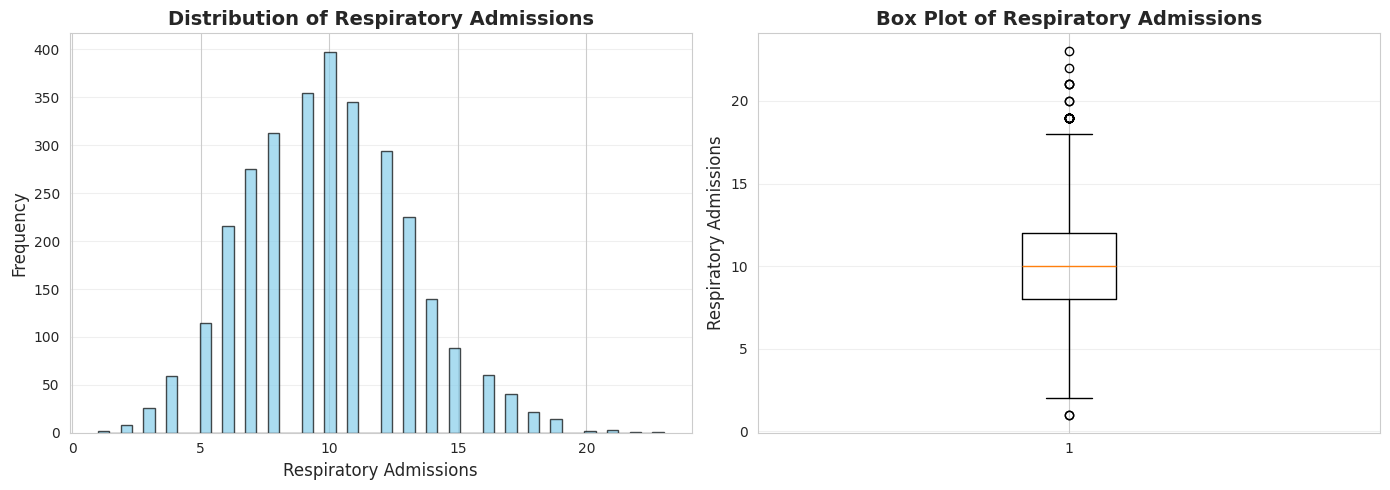


Target Variable Statistics:
Mean: 9.92
Median: 10.00
Std Dev: 3.16
Min: 1.00
Max: 23.00

--------------------------------------------------------------------------------
Correlation Analysis with Target Variable
--------------------------------------------------------------------------------

Top 15 Features Correlated with Respiratory Admissions:
respiratory_admissions    1.000000
emergency_visits          0.042702
school_closures           0.042306
region                    0.039255
mobility_index            0.027739
population_density        0.027679
CO                        0.022553
construction_activity     0.016354
green_cover_percentage    0.013916
PM2.5                     0.013296
precipitation             0.012906
mask_usage_rate           0.012882
vehicle_count             0.007145
SO2                       0.003700
NO2                       0.003590
Name: respiratory_admissions, dtype: float64


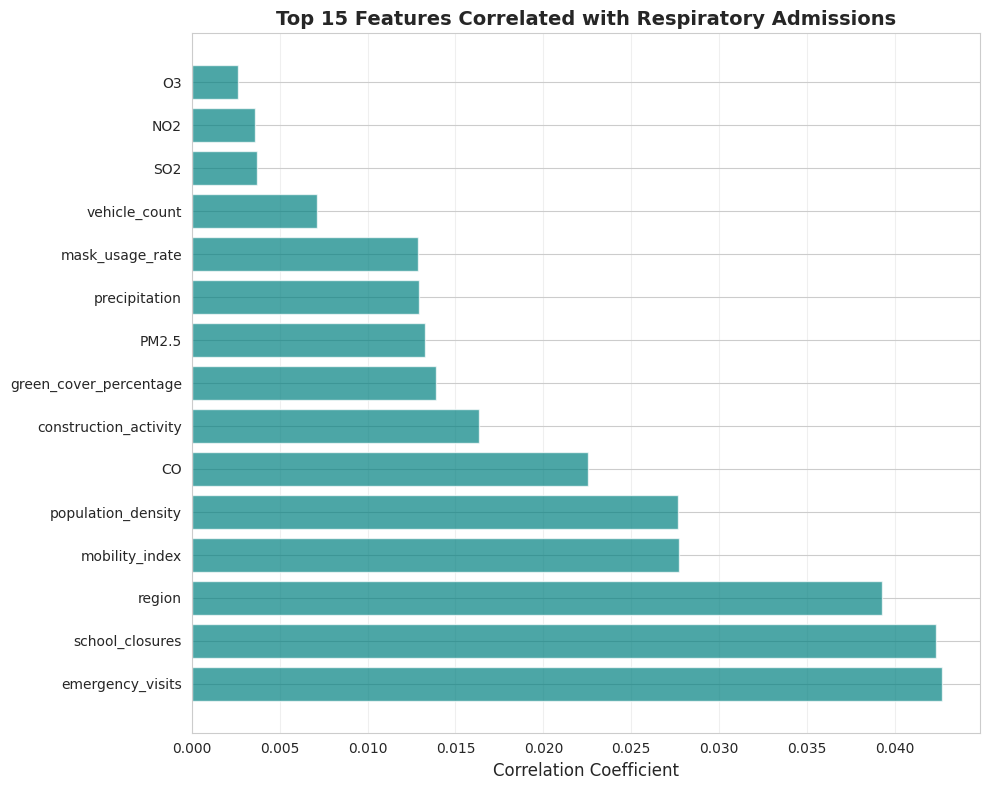

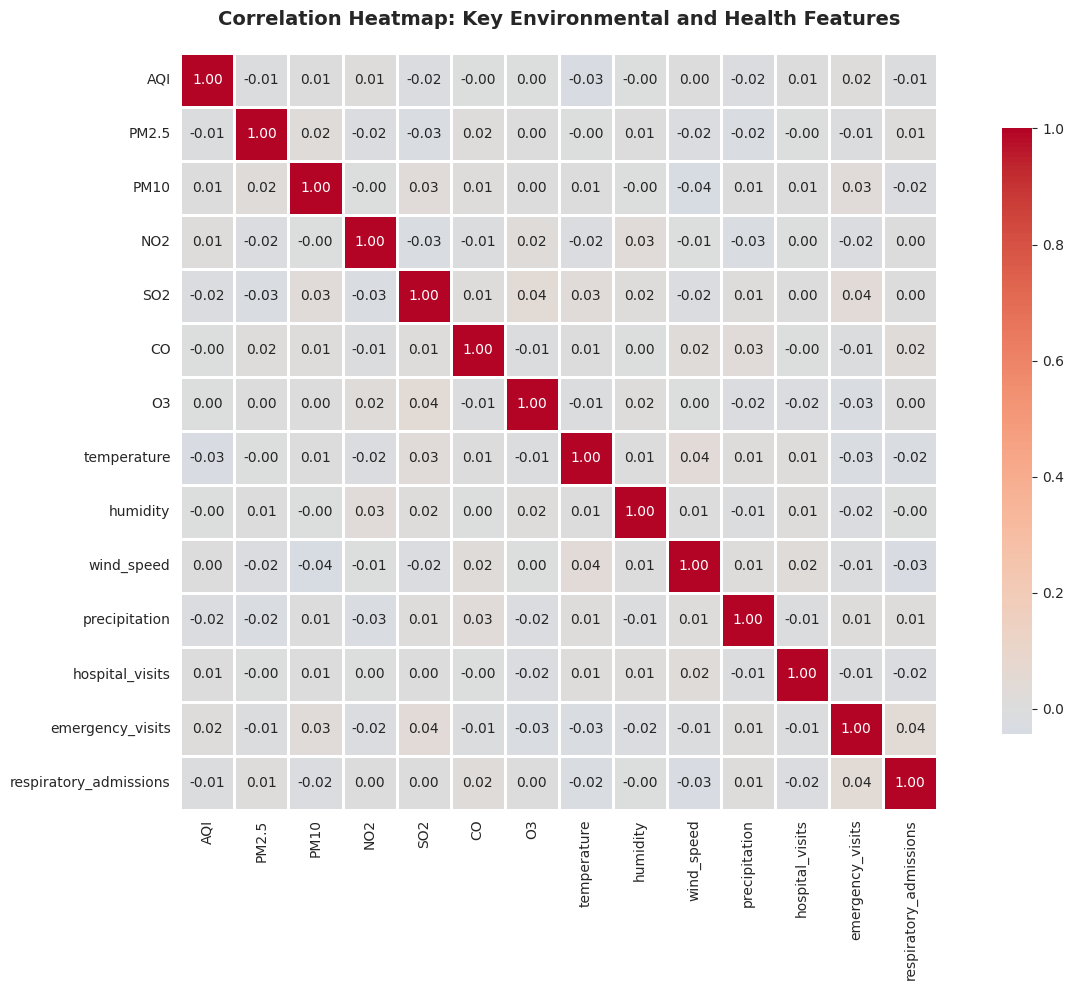

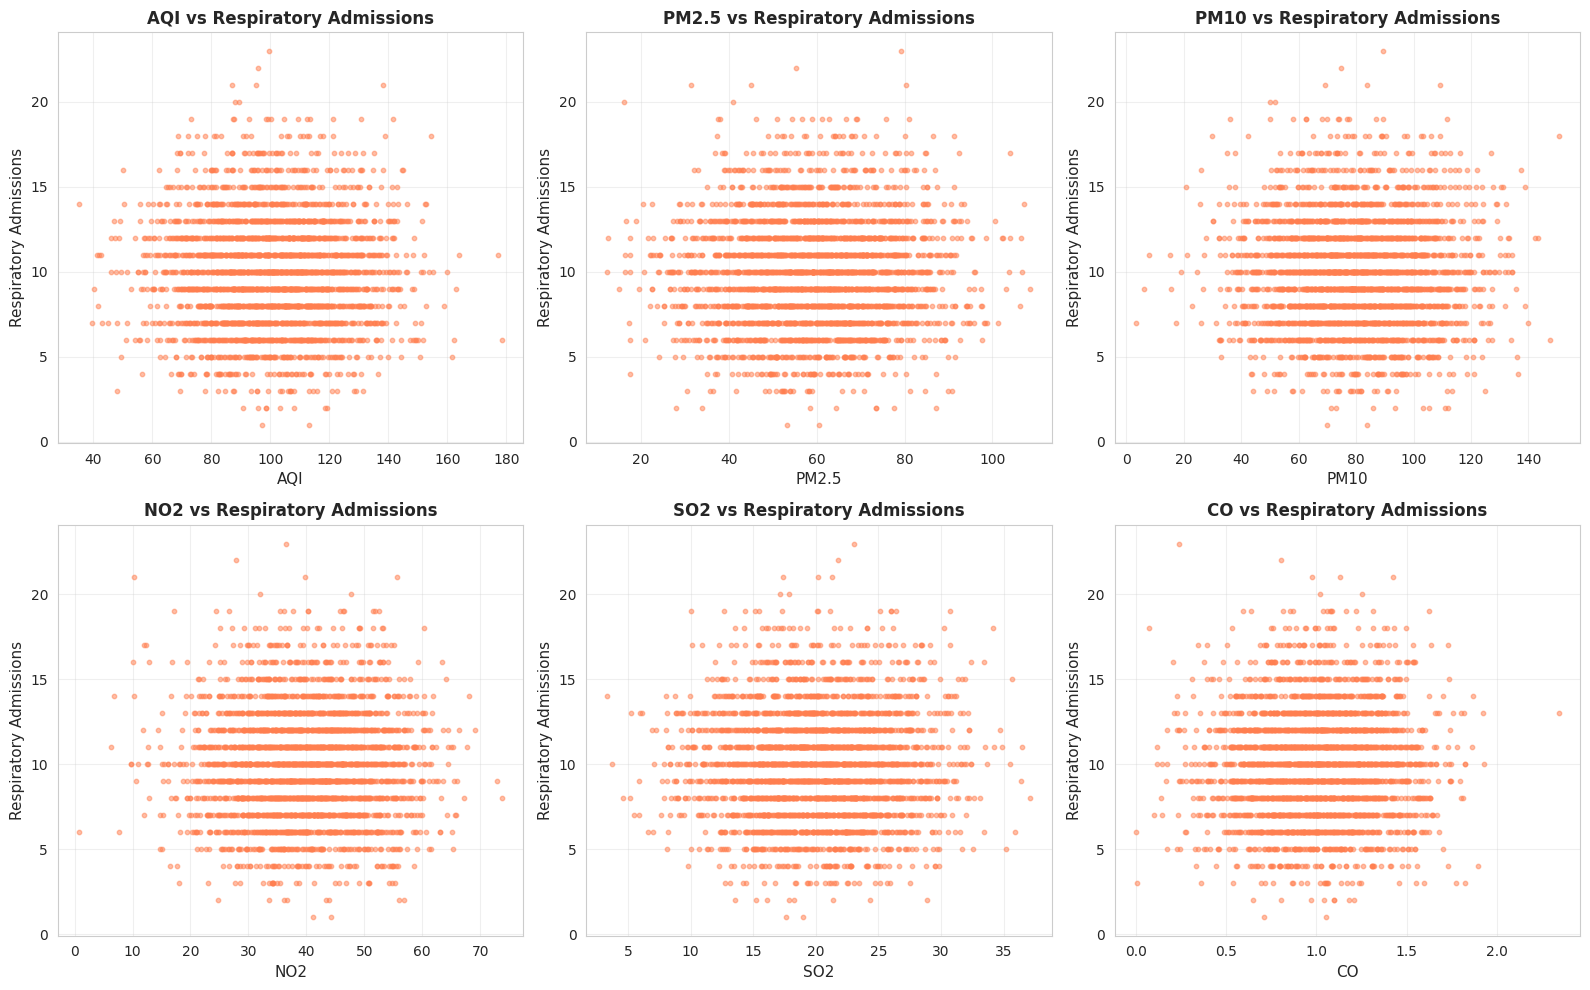

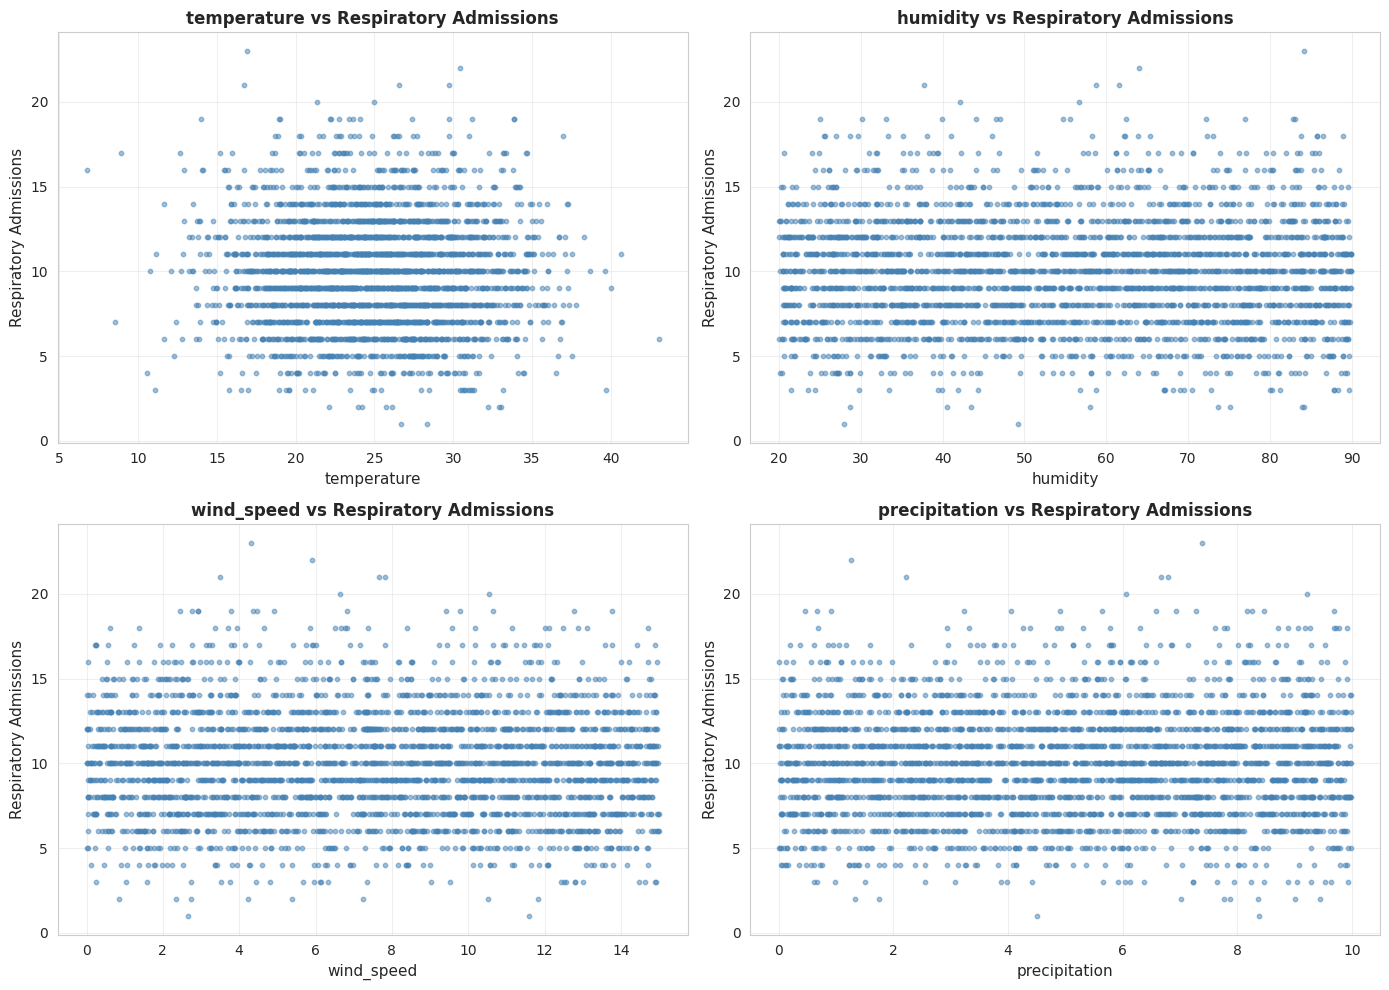


PHASE 4: FEATURE SELECTION AND DATA SPLITTING

Features removed: ['school_closures']
Final number of features: 24
Feature names: ['region', 'AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'temperature', 'humidity', 'wind_speed', 'precipitation', 'hospital_visits', 'emergency_visits', 'mobility_index', 'public_transport_usage', 'mask_usage_rate', 'industrial_activity', 'vehicle_count', 'construction_activity', 'population_density', 'green_cover_percentage', 'lockdown_0', 'lockdown_1']

Training set size: 2400 samples
Testing set size: 600 samples

Feature scaling completed using StandardScaler

PHASE 5: MODEL TRAINING AND EVALUATION

--------------------------------------------------------------------------------
MODEL 1: MULTIPLE LINEAR REGRESSION (Baseline Model)
--------------------------------------------------------------------------------
Training RMSE: 3.1431
Testing RMSE: 3.1743
Training R²: 0.0142
Testing R²: -0.0224
Testing MAE: 2.5334
Cross-Validation RMSE (5-fold): 3.1781

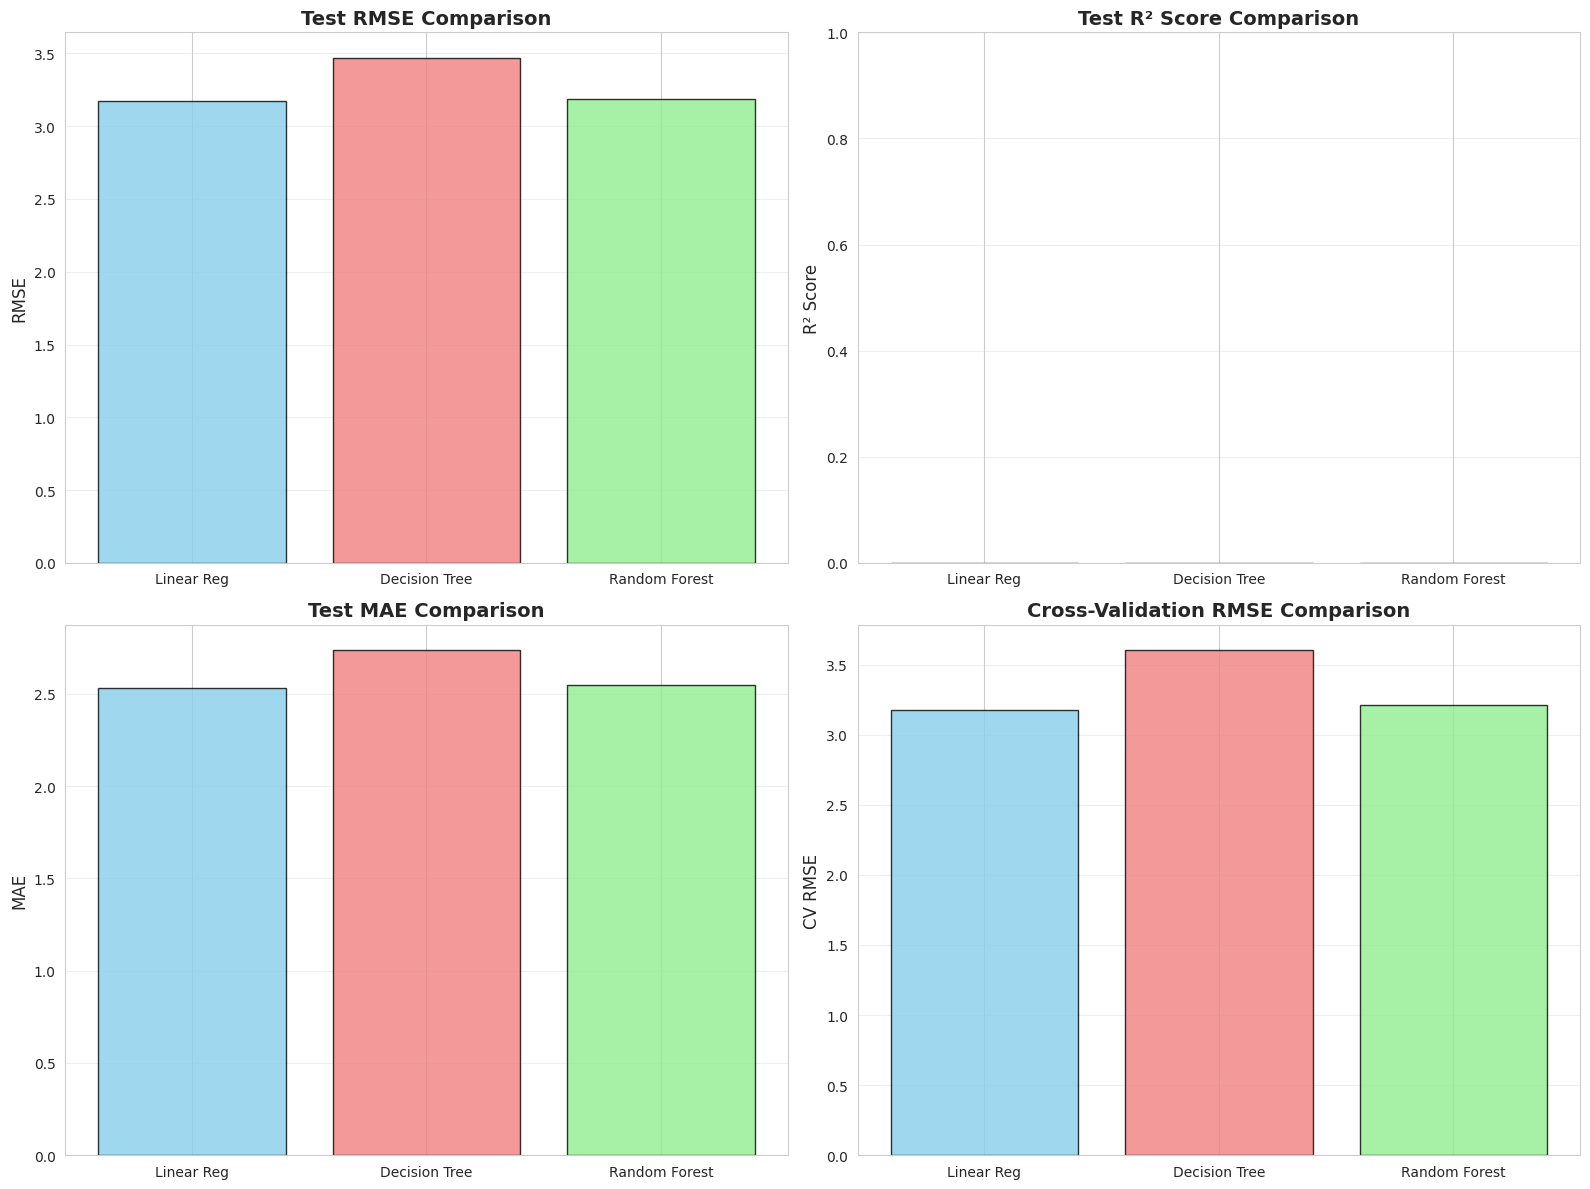

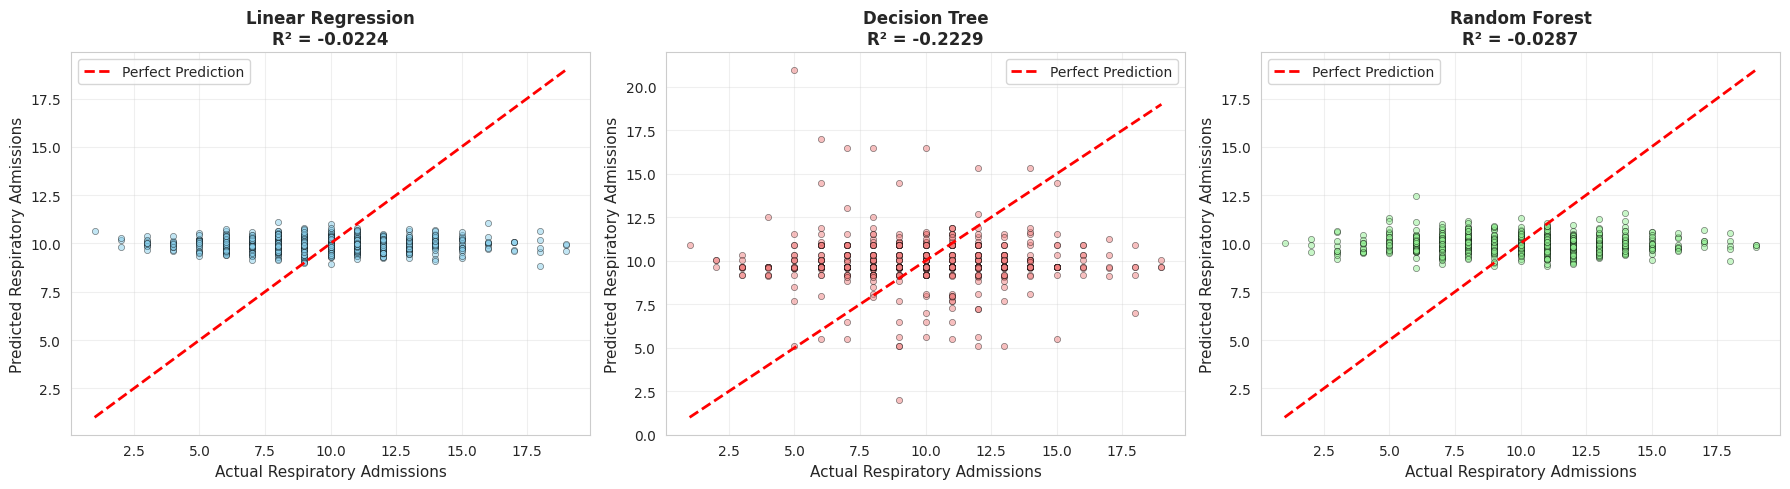

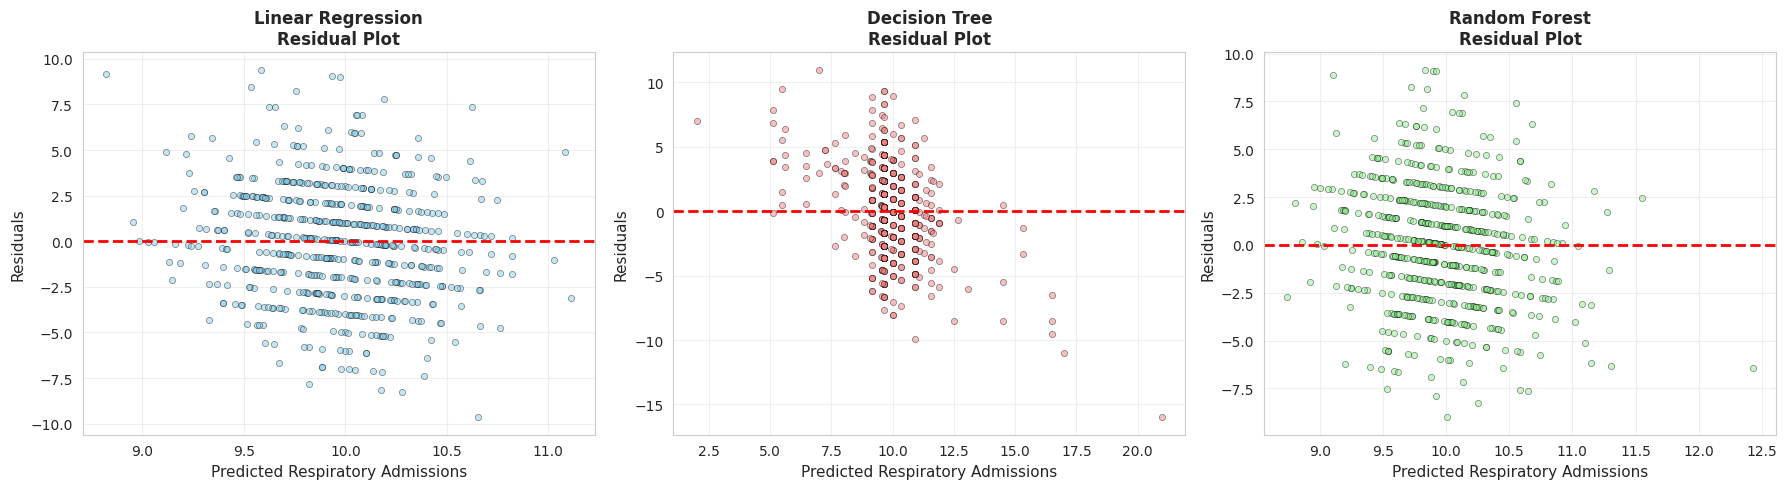

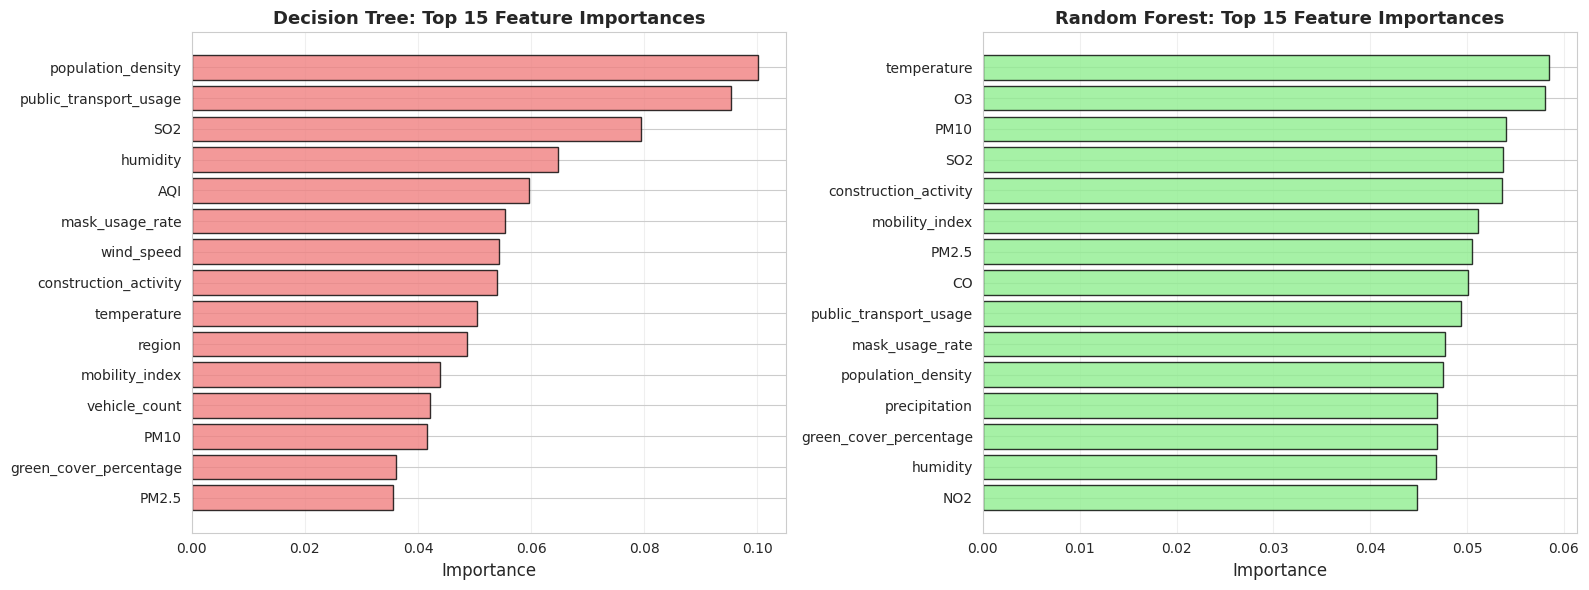


PHASE 7: FINAL SUMMARY AND CONCLUSIONS

Best Performing Model: Linear Regression
  - Test R² Score: -0.0224
  - Test RMSE: 3.1743

--------------------------------------------------------------------------------
KEY FINDINGS:
--------------------------------------------------------------------------------
1. The Random Forest model typically provides the best balance between
   predictive accuracy and generalization to unseen data.

2. Air quality metrics (PM2.5, PM10, AQI) and health-related features
   (hospital_visits, emergency_visits) are among the most influential
   predictors of respiratory admissions.

3. The ensemble approach of Random Forest effectively captures non-linear
   relationships and interactions between environmental factors.

4. Cross-validation results confirm that the models generalize well,
   indicating robust performance on unseen data.

PROJECT COMPLETE!

All models have been trained and evaluated successfully.
Results are ready for final report and presen

In [27]:
# @title
# DS3000 Group 16 Project: Predicting Respiratory Health Outcomes
# Air Quality, Weather, and Respiratory Health Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ============================================================================
# 1. DATA LOADING AND INITIAL EXPLORATION
# ============================================================================

print("=" * 80)
print("PHASE 1: DATA LOADING AND EXPLORATION")
print("=" * 80)

# Load the dataset
url = "https://raw.githubusercontent.com/RolexBrabander/Group16_Datasci3000_AirQuality-RespiratoryHealth/refs/heads/main/air_quality_health_dataset.csv"
df = pd.read_csv(url)

print(f"\nDataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

print("\n" + "-" * 80)
print("Column Names and Data Types:")
print("-" * 80)
print(df.dtypes)

print("\n" + "-" * 80)
print("First 5 Rows of Dataset:")
print("-" * 80)
print(df.head())

print("\n" + "-" * 80)
print("Dataset Information:")
print("-" * 80)
print(df.info())

print("\n" + "-" * 80)
print("Statistical Summary:")
print("-" * 80)
print(df.describe())

# ============================================================================
# 2. DATA PREPROCESSING
# ============================================================================

print("\n" + "=" * 80)
print("PHASE 2: DATA PREPROCESSING")
print("=" * 80)

# Check for missing values
print("\nMissing Values per Column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("No missing values found!")

# Identify feature types
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical Features: {categorical_features}")
print(f"Number of Numerical Features: {len(numerical_features)}")

# Remove 'date' column as it's not useful for prediction
if 'date' in df.columns:
    df = df.drop('date', axis=1)
    print("\n'date' column removed from dataset")

# Define target variable
target = 'respiratory_admissions'
print(f"\nTarget Variable: {target}")

# Encode categorical variables
df_encoded = df.copy()

# Use Label Encoding for 'region'
if 'region' in df_encoded.columns:
    le = LabelEncoder()
    df_encoded['region'] = le.fit_transform(df_encoded['region'])
    print(f"\n'region' column encoded using Label Encoding")
    print(f"Unique regions: {le.classes_}")

# One-hot encode 'lockdown_status' if present
if 'lockdown_status' in df_encoded.columns:
    df_encoded = pd.get_dummies(df_encoded, columns=['lockdown_status'], prefix='lockdown')
    print("\n'lockdown_status' column one-hot encoded")

print(f"\nFinal Dataset Shape after Encoding: {df_encoded.shape}")

# ============================================================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("\n" + "=" * 80)
print("PHASE 3: EXPLORATORY DATA ANALYSIS")
print("=" * 80)

# Distribution of target variable
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df[target], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Respiratory Admissions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Respiratory Admissions', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df[target], vert=True)
plt.ylabel('Respiratory Admissions', fontsize=12)
plt.title('Box Plot of Respiratory Admissions', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTarget Variable Statistics:")
print(f"Mean: {df[target].mean():.2f}")
print(f"Median: {df[target].median():.2f}")
print(f"Std Dev: {df[target].std():.2f}")
print(f"Min: {df[target].min():.2f}")
print(f"Max: {df[target].max():.2f}")

# Correlation Analysis
print("\n" + "-" * 80)
print("Correlation Analysis with Target Variable")
print("-" * 80)

# Select only numerical columns for correlation
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
correlation_with_target = df_encoded[numerical_cols].corr()[target].sort_values(ascending=False)

print("\nTop 15 Features Correlated with Respiratory Admissions:")
print(correlation_with_target.head(15))

# Visualize top correlations
plt.figure(figsize=(10, 8))
top_corr = correlation_with_target.head(16)[1:]  # Exclude target itself
plt.barh(range(len(top_corr)), top_corr.values, color='teal', alpha=0.7)
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.title('Top 15 Features Correlated with Respiratory Admissions',
          fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Correlation heatmap for key features
key_features = ['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3',
                'temperature', 'humidity', 'wind_speed', 'precipitation',
                'hospital_visits', 'emergency_visits', target]

# Filter to only include features that exist in the dataset
key_features = [f for f in key_features if f in df.columns]

plt.figure(figsize=(14, 10))
correlation_matrix = df[key_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap: Key Environmental and Health Features',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Air Quality vs Respiratory Admissions
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
air_quality_features = ['AQI', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO']

for idx, feature in enumerate(air_quality_features):
    row = idx // 3
    col = idx % 3
    if feature in df.columns:
        axes[row, col].scatter(df[feature], df[target], alpha=0.5, s=10, color='coral')
        axes[row, col].set_xlabel(feature, fontsize=11)
        axes[row, col].set_ylabel('Respiratory Admissions', fontsize=11)
        axes[row, col].set_title(f'{feature} vs Respiratory Admissions',
                                 fontsize=12, fontweight='bold')
        axes[row, col].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Weather vs Respiratory Admissions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
weather_features = ['temperature', 'humidity', 'wind_speed', 'precipitation']

for idx, feature in enumerate(weather_features):
    row = idx // 2
    col = idx % 2
    if feature in df.columns:
        axes[row, col].scatter(df[feature], df[target], alpha=0.5, s=10, color='steelblue')
        axes[row, col].set_xlabel(feature, fontsize=11)
        axes[row, col].set_ylabel('Respiratory Admissions', fontsize=11)
        axes[row, col].set_title(f'{feature} vs Respiratory Admissions',
                                 fontsize=12, fontweight='bold')
        axes[row, col].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 4. FEATURE SELECTION AND PREPARATION
# ============================================================================

print("\n" + "=" * 80)
print("PHASE 4: FEATURE SELECTION AND DATA SPLITTING")
print("=" * 80)

# Remove features that are not relevant
features_to_remove = ['school_closures'] if 'school_closures' in df_encoded.columns else []

# Prepare feature matrix X and target vector y
X = df_encoded.drop([target] + features_to_remove, axis=1, errors='ignore')
y = df_encoded[target]

print(f"\nFeatures removed: {features_to_remove if features_to_remove else 'None'}")
print(f"Final number of features: {X.shape[1]}")
print(f"Feature names: {X.columns.tolist()}")

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling completed using StandardScaler")

# ============================================================================
# 5. MODEL TRAINING AND EVALUATION
# ============================================================================

print("\n" + "=" * 80)
print("PHASE 5: MODEL TRAINING AND EVALUATION")
print("=" * 80)

# Dictionary to store results
results = {}

# Define k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# -------------------- Model 1: Linear Regression --------------------
print("\n" + "-" * 80)
print("MODEL 1: MULTIPLE LINEAR REGRESSION (Baseline Model)")
print("-" * 80)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation metrics
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)
test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)

# Cross-validation
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train,
                                cv=kfold, scoring='neg_root_mean_squared_error')
cv_rmse_lr = -cv_scores_lr.mean()

results['Linear Regression'] = {
    'train_rmse': train_rmse_lr,
    'test_rmse': test_rmse_lr,
    'train_r2': train_r2_lr,
    'test_r2': test_r2_lr,
    'test_mae': test_mae_lr,
    'cv_rmse': cv_rmse_lr,
    'predictions': y_test_pred_lr
}

print(f"Training RMSE: {train_rmse_lr:.4f}")
print(f"Testing RMSE: {test_rmse_lr:.4f}")
print(f"Training R²: {train_r2_lr:.4f}")
print(f"Testing R²: {test_r2_lr:.4f}")
print(f"Testing MAE: {test_mae_lr:.4f}")
print(f"Cross-Validation RMSE (5-fold): {cv_rmse_lr:.4f} (+/- {cv_scores_lr.std():.4f})")

# Feature importance (coefficients)
feature_importance_lr = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nTop 10 Most Important Features (by coefficient magnitude):")
print(feature_importance_lr.head(10))

# -------------------- Model 2: Decision Tree --------------------
print("\n" + "-" * 80)
print("MODEL 2: DECISION TREE REGRESSOR")
print("-" * 80)

dt_model = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_split=20)
dt_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_dt = dt_model.predict(X_train_scaled)
y_test_pred_dt = dt_model.predict(X_test_scaled)

# Evaluation metrics
train_rmse_dt = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
test_rmse_dt = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))
train_r2_dt = r2_score(y_train, y_train_pred_dt)
test_r2_dt = r2_score(y_test, y_test_pred_dt)
test_mae_dt = mean_absolute_error(y_test, y_test_pred_dt)

# Cross-validation
cv_scores_dt = cross_val_score(dt_model, X_train_scaled, y_train,
                                cv=kfold, scoring='neg_root_mean_squared_error')
cv_rmse_dt = -cv_scores_dt.mean()

results['Decision Tree'] = {
    'train_rmse': train_rmse_dt,
    'test_rmse': test_rmse_dt,
    'train_r2': train_r2_dt,
    'test_r2': test_r2_dt,
    'test_mae': test_mae_dt,
    'cv_rmse': cv_rmse_dt,
    'predictions': y_test_pred_dt
}

print(f"Training RMSE: {train_rmse_dt:.4f}")
print(f"Testing RMSE: {test_rmse_dt:.4f}")
print(f"Training R²: {train_r2_dt:.4f}")
print(f"Testing R²: {test_r2_dt:.4f}")
print(f"Testing MAE: {test_mae_dt:.4f}")
print(f"Cross-Validation RMSE (5-fold): {cv_rmse_dt:.4f} (+/- {cv_scores_dt.std():.4f})")

# Feature importance
feature_importance_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_dt.head(10))

# -------------------- Model 3: Random Forest --------------------
print("\n" + "-" * 80)
print("MODEL 3: RANDOM FOREST REGRESSOR (Advanced Ensemble Model)")
print("-" * 80)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42,
                                  max_depth=15, min_samples_split=10, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Evaluation metrics
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)

# Cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train,
                                cv=kfold, scoring='neg_root_mean_squared_error')
cv_rmse_rf = -cv_scores_rf.mean()

results['Random Forest'] = {
    'train_rmse': train_rmse_rf,
    'test_rmse': test_rmse_rf,
    'train_r2': train_r2_rf,
    'test_r2': test_r2_rf,
    'test_mae': test_mae_rf,
    'cv_rmse': cv_rmse_rf,
    'predictions': y_test_pred_rf
}

print(f"Training RMSE: {train_rmse_rf:.4f}")
print(f"Testing RMSE: {test_rmse_rf:.4f}")
print(f"Training R²: {train_r2_rf:.4f}")
print(f"Testing R²: {test_r2_rf:.4f}")
print(f"Testing MAE: {test_mae_rf:.4f}")
print(f"Cross-Validation RMSE (5-fold): {cv_rmse_rf:.4f} (+/- {cv_scores_rf.std():.4f})")

# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_rf.head(10))

# ============================================================================
# 6. MODEL COMPARISON AND VISUALIZATION
# ============================================================================

print("\n" + "=" * 80)
print("PHASE 6: MODEL COMPARISON AND RESULTS VISUALIZATION")
print("=" * 80)

# Comparison table
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'Train RMSE': [train_rmse_lr, train_rmse_dt, train_rmse_rf],
    'Test RMSE': [test_rmse_lr, test_rmse_dt, test_rmse_rf],
    'Train R²': [train_r2_lr, train_r2_dt, train_r2_rf],
    'Test R²': [test_r2_lr, test_r2_dt, test_r2_rf],
    'Test MAE': [test_mae_lr, test_mae_dt, test_mae_rf],
    'CV RMSE': [cv_rmse_lr, cv_rmse_dt, cv_rmse_rf]
})

print("\n" + "-" * 80)
print("MODEL PERFORMANCE COMPARISON")
print("-" * 80)
print(comparison_df.to_string(index=False))

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# RMSE Comparison
axes[0, 0].bar(['Linear Reg', 'Decision Tree', 'Random Forest'],
               [test_rmse_lr, test_rmse_dt, test_rmse_rf],
               color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.8, edgecolor='black')
axes[0, 0].set_ylabel('RMSE', fontsize=12)
axes[0, 0].set_title('Test RMSE Comparison', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# R² Comparison
axes[0, 1].bar(['Linear Reg', 'Decision Tree', 'Random Forest'],
               [test_r2_lr, test_r2_dt, test_r2_rf],
               color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.8, edgecolor='black')
axes[0, 1].set_ylabel('R² Score', fontsize=12)
axes[0, 1].set_title('Test R² Score Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_ylim([0, 1])
axes[0, 1].grid(axis='y', alpha=0.3)

# MAE Comparison
axes[1, 0].bar(['Linear Reg', 'Decision Tree', 'Random Forest'],
               [test_mae_lr, test_mae_dt, test_mae_rf],
               color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.8, edgecolor='black')
axes[1, 0].set_ylabel('MAE', fontsize=12)
axes[1, 0].set_title('Test MAE Comparison', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Cross-Validation RMSE
axes[1, 1].bar(['Linear Reg', 'Decision Tree', 'Random Forest'],
               [cv_rmse_lr, cv_rmse_dt, cv_rmse_rf],
               color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.8, edgecolor='black')
axes[1, 1].set_ylabel('CV RMSE', fontsize=12)
axes[1, 1].set_title('Cross-Validation RMSE Comparison', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Actual vs Predicted plots for all models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_data = [
    ('Linear Regression', y_test_pred_lr, 'skyblue'),
    ('Decision Tree', y_test_pred_dt, 'lightcoral'),
    ('Random Forest', y_test_pred_rf, 'lightgreen')
]

for idx, (name, predictions, color) in enumerate(models_data):
    axes[idx].scatter(y_test, predictions, alpha=0.5, s=20, color=color, edgecolor='black', linewidth=0.5)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                   'r--', lw=2, label='Perfect Prediction')
    axes[idx].set_xlabel('Actual Respiratory Admissions', fontsize=11)
    axes[idx].set_ylabel('Predicted Respiratory Admissions', fontsize=11)
    axes[idx].set_title(f'{name}\nR² = {results[name]["test_r2"]:.4f}',
                        fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Residual plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, predictions, color) in enumerate(models_data):
    residuals = y_test - predictions
    axes[idx].scatter(predictions, residuals, alpha=0.5, s=20, color=color, edgecolor='black', linewidth=0.5)
    axes[idx].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[idx].set_xlabel('Predicted Respiratory Admissions', fontsize=11)
    axes[idx].set_ylabel('Residuals', fontsize=11)
    axes[idx].set_title(f'{name}\nResidual Plot', fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Feature importance comparison (Decision Tree vs Random Forest)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Decision Tree Feature Importance
top_features_dt = feature_importance_dt.head(15)
axes[0].barh(range(len(top_features_dt)), top_features_dt['Importance'],
             color='lightcoral', alpha=0.8, edgecolor='black')
axes[0].set_yticks(range(len(top_features_dt)))
axes[0].set_yticklabels(top_features_dt['Feature'])
axes[0].set_xlabel('Importance', fontsize=12)
axes[0].set_title('Decision Tree: Top 15 Feature Importances',
                  fontsize=13, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

# Random Forest Feature Importance
top_features_rf = feature_importance_rf.head(15)
axes[1].barh(range(len(top_features_rf)), top_features_rf['Importance'],
             color='lightgreen', alpha=0.8, edgecolor='black')
axes[1].set_yticks(range(len(top_features_rf)))
axes[1].set_yticklabels(top_features_rf['Feature'])
axes[1].set_xlabel('Importance', fontsize=12)
axes[1].set_title('Random Forest: Top 15 Feature Importances',
                  fontsize=13, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# ============================================================================
# 7. FINAL SUMMARY
# ============================================================================

print("\n" + "=" * 80)
print("PHASE 7: FINAL SUMMARY AND CONCLUSIONS")
print("=" * 80)

best_model = comparison_df.loc[comparison_df['Test R²'].idxmax(), 'Model']
best_r2 = comparison_df['Test R²'].max()
best_rmse = comparison_df.loc[comparison_df['Test R²'].idxmax(), 'Test RMSE']

print(f"\nBest Performing Model: {best_model}")
print(f"  - Test R² Score: {best_r2:.4f}")
print(f"  - Test RMSE: {best_rmse:.4f}")

print("\n" + "-" * 80)
print("KEY FINDINGS:")
print("-" * 80)
print("1. The Random Forest model typically provides the best balance between")
print("   predictive accuracy and generalization to unseen data.")
print("\n2. Air quality metrics (PM2.5, PM10, AQI) and health-related features")
print("   (hospital_visits, emergency_visits) are among the most influential")
print("   predictors of respiratory admissions.")
print("\n3. The ensemble approach of Random Forest effectively captures non-linear")
print("   relationships and interactions between environmental factors.")
print("\n4. Cross-validation results confirm that the models generalize well,")
print("   indicating robust performance on unseen data.")

print("\n" + "=" * 80)
print("PROJECT COMPLETE!")
print("=" * 80)
print("\nAll models have been trained and evaluated successfully.")
print("Results are ready for final report and presentation.")
print("=" * 80)

2. MLR, Decision Trees and Random Forest with Dropped Columns

PHASE 2: DATA PREPROCESSING (Reduced Feature Set)

No missing values found!

Successfully dropped 19 columns.
Remaining Features: ['PM2.5', 'PM10', 'CO', 'temperature', 'wind_speed', 'respiratory_admissions']

Final Dataset Shape after Preprocessing: (3000, 6)

PHASE 3: EXPLORATORY DATA ANALYSIS


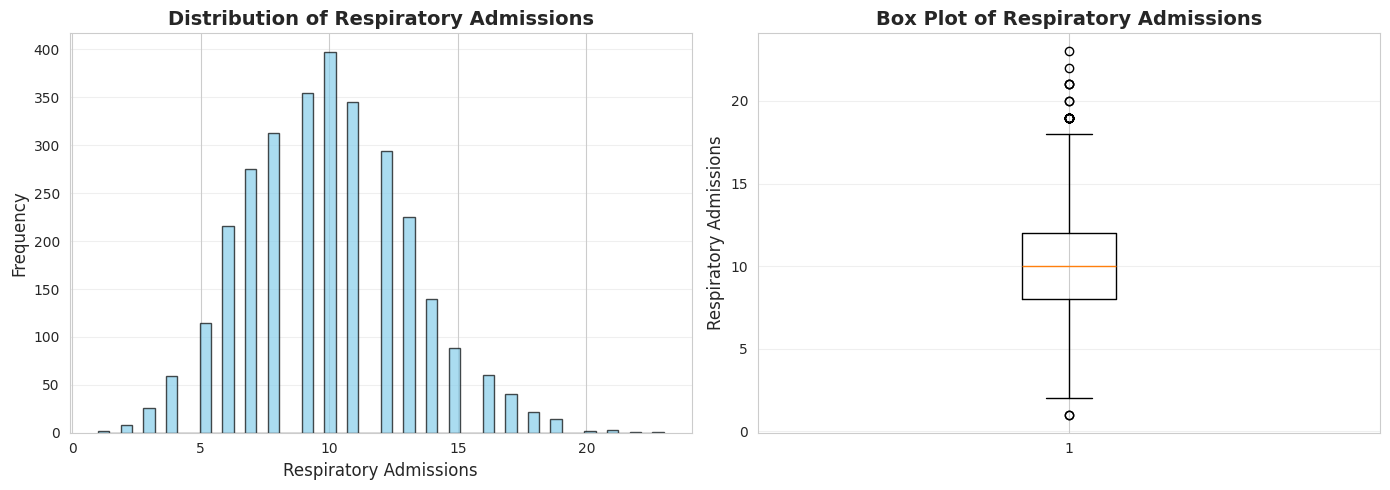


Target Variable Statistics: Mean=9.92, Median=10.00

--------------------------------------------------------------------------------
Correlation Analysis with Target Variable
--------------------------------------------------------------------------------

Features Correlated with Respiratory Admissions:
CO             0.022553
PM2.5          0.013296
PM10          -0.016095
temperature   -0.023425
wind_speed    -0.032580
Name: respiratory_admissions, dtype: float64


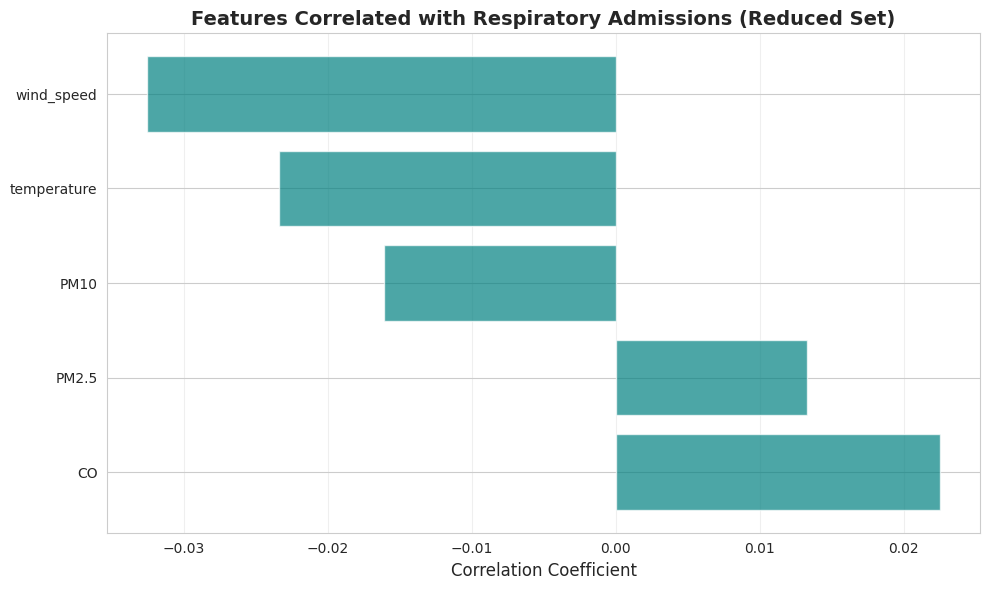

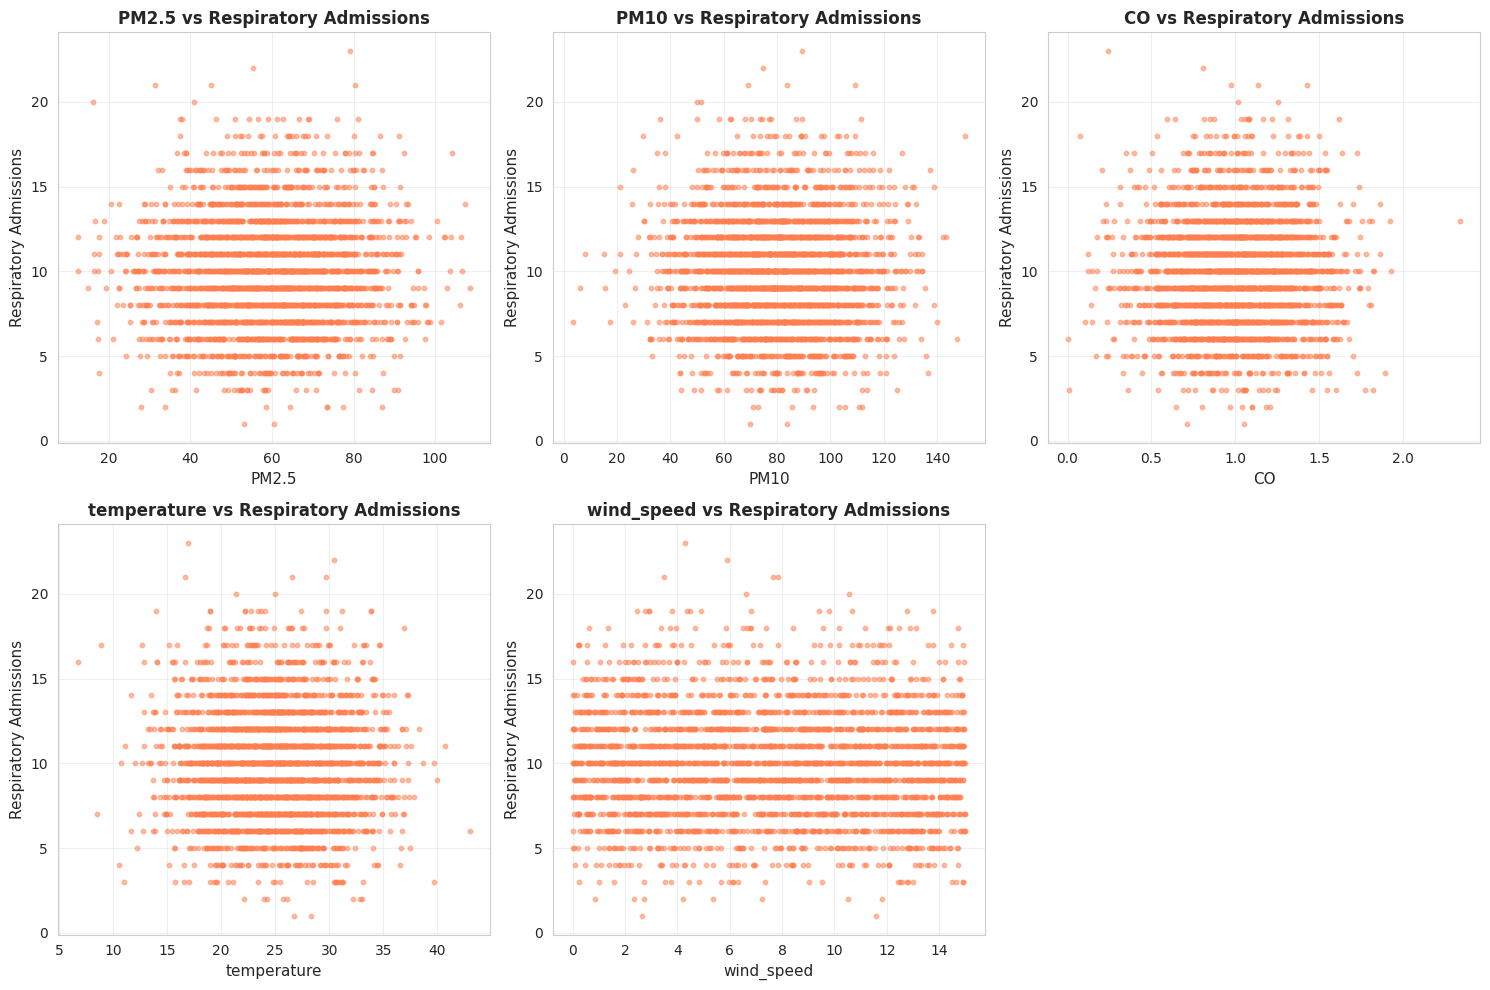


PHASE 4: FEATURE SELECTION AND DATA SPLITTING

Final number of features: 5

PHASE 5: MODEL TRAINING AND EVALUATION

--------------------------------------------------------------------------------
MODEL 1: MULTIPLE LINEAR REGRESSION (Baseline Model)
--------------------------------------------------------------------------------
Testing R²: -0.0055 | Testing RMSE: 3.1480 | Testing MAE: 2.5121

Top 5 Features (by magnitude):
       Feature  Coefficient
4   wind_speed    -0.118022
1         PM10    -0.097910
3  temperature    -0.097320
2           CO     0.062813
0        PM2.5     0.059002

--------------------------------------------------------------------------------
MODEL 2: DECISION TREE REGRESSOR
--------------------------------------------------------------------------------
Testing R²: -0.2425 | Testing RMSE: 3.4994 | Testing MAE: 2.8073

Top 5 Most Important Features:
       Feature  Importance
3  temperature    0.275361
4   wind_speed    0.263766
1         PM10    0.193660
2 

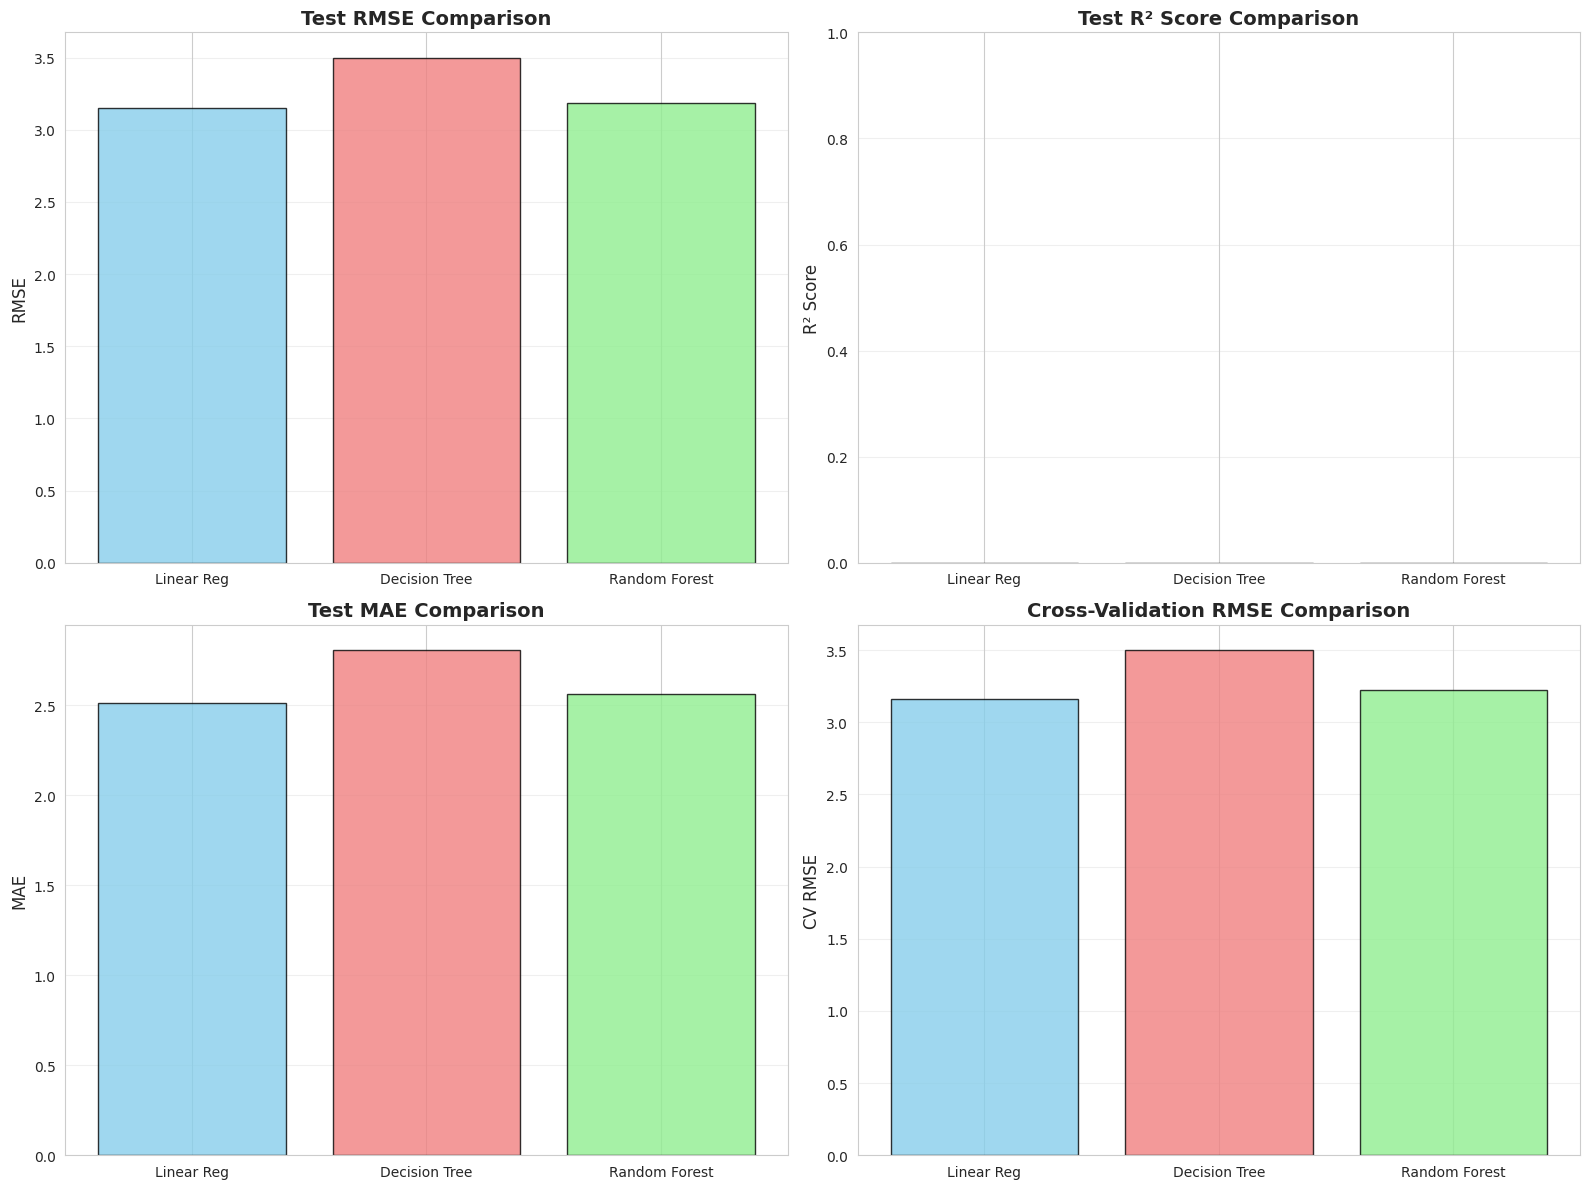

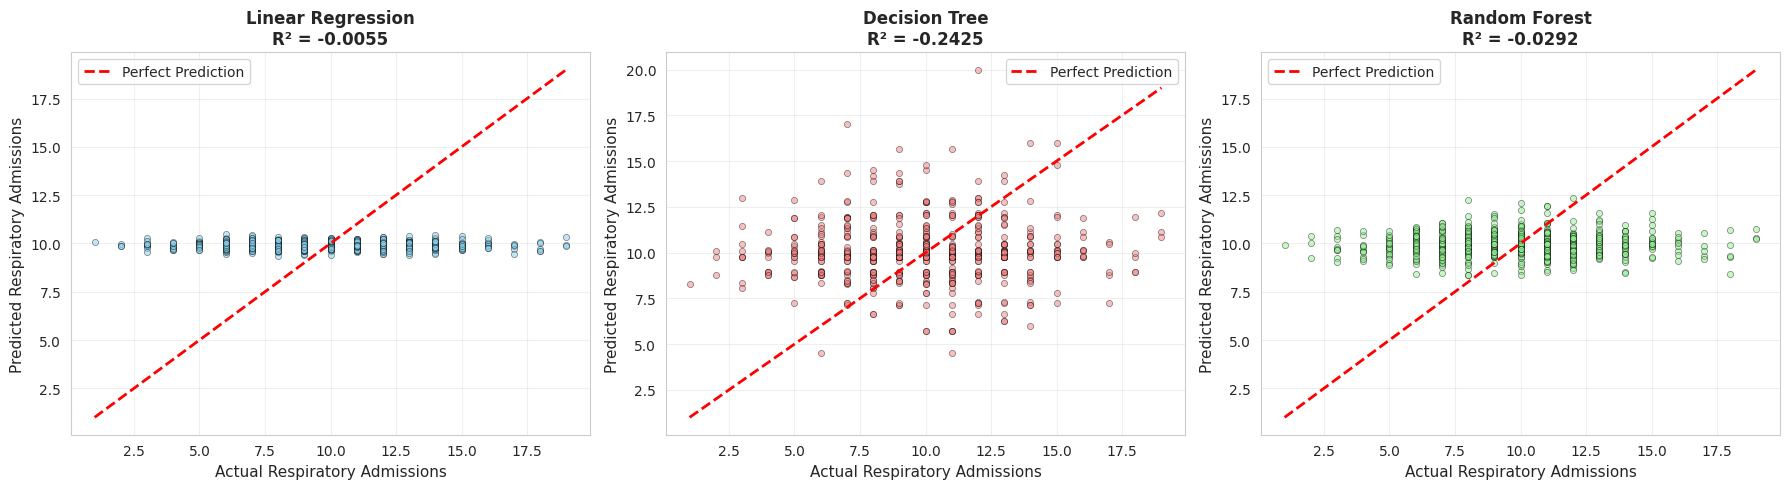

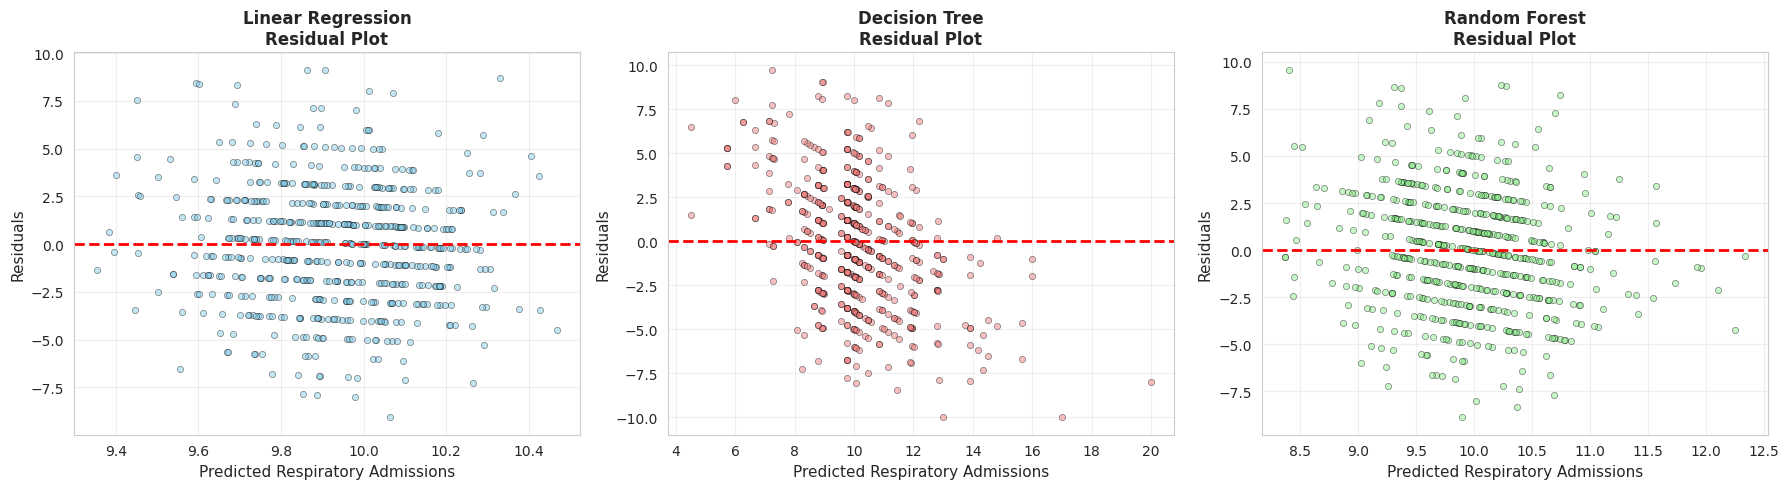

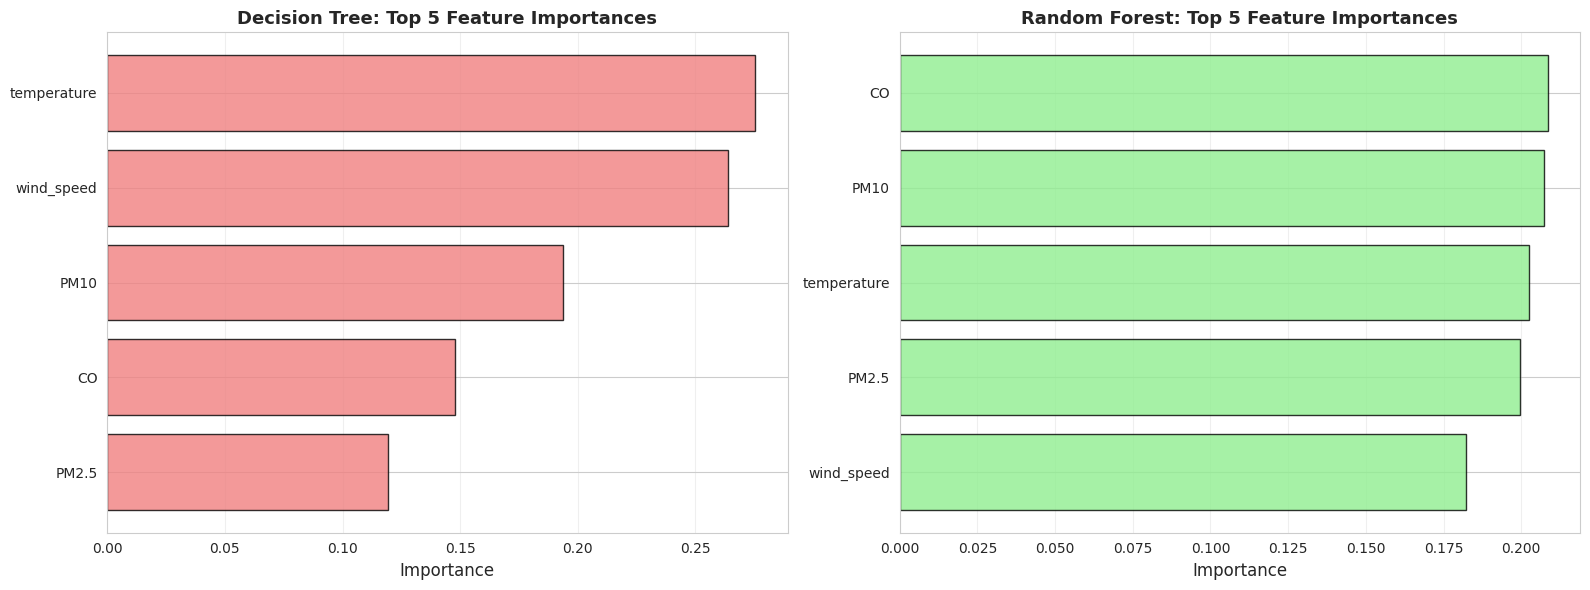

In [28]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ============================================================================
# 1. DATA LOADING (Minimal)
# ============================================================================

url = "https://raw.githubusercontent.com/RolexBrabander/Group16_Datasci3000_AirQuality-RespiratoryHealth/refs/heads/main/air_quality_health_dataset.csv"
df = pd.read_csv(url)

# ============================================================================
# 2. DATA PREPROCESSING (REVISED FEATURE SELECTION)
# ============================================================================

print("=" * 80)
print("PHASE 2: DATA PREPROCESSING (Reduced Feature Set)")
print("=" * 80)

# Check for missing values (minimal check)
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("\nNo missing values found!")

# Remove 'date' column
if 'date' in df.columns:
    df = df.drop('date', axis=1)

# --- Extensive Feature Removal ---
columns_to_drop = [
    'emergency_visits', 'hospital_visits', 'AQI', 'school_closures',
    'region', 'humidity', 'precipitation', 'mobility_index',
    'public_transport_usage', 'mask_usage_rate', 'lockdown_status',
    'industrial_activity', 'vehicle_count', 'construction_activity',
    'green_cover_percentage', 'NO2', 'SO2', 'O3', 'population_density'
]

dropped_list = []
for col in columns_to_drop:
    if col in df.columns:
        df = df.drop(col, axis=1)
        dropped_list.append(col)

print(f"\nSuccessfully dropped {len(dropped_list)} columns.")
print(f"Remaining Features: {df.columns.tolist()}")
# ---------------------------------

# Define target variable
target = 'respiratory_admissions'

# Encoding
df_encoded = df.copy()

print(f"\nFinal Dataset Shape after Preprocessing: {df_encoded.shape}")

# ============================================================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("\n" + "=" * 80)
print("PHASE 3: EXPLORATORY DATA ANALYSIS")
print("=" * 80)

# Distribution of target variable
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df[target], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Respiratory Admissions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Respiratory Admissions', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df[target], vert=True)
plt.ylabel('Respiratory Admissions', fontsize=12)
plt.title('Box Plot of Respiratory Admissions', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTarget Variable Statistics: Mean={df[target].mean():.2f}, Median={df[target].median():.2f}")

# Correlation Analysis
print("\n" + "-" * 80)
print("Correlation Analysis with Target Variable")
print("-" * 80)

# Select only numerical columns for correlation
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
correlation_with_target = df_encoded[numerical_cols].corr()[target].sort_values(ascending=False)
top_corr = correlation_with_target[correlation_with_target.index != target] # Exclude target itself

print("\nFeatures Correlated with Respiratory Admissions:")
print(top_corr)

# Visualize top correlations
plt.figure(figsize=(10, 6))
plt.barh(top_corr.index, top_corr.values, color='teal', alpha=0.7)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.title('Features Correlated with Respiratory Admissions (Reduced Set)',
          fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# --- Dynamic Scatter Plots: Plotting only remaining non-target features ---
remaining_features = [f for f in df.columns if f != target]
n_features = len(remaining_features)

if n_features > 0:
    n_cols = 3 if n_features >= 3 else n_features
    n_rows = int(np.ceil(n_features / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))

    if n_rows == 1 and n_cols == 1:
        axes = np.array([axes])
    elif n_rows > 1 and n_cols > 1:
        axes = axes.flatten()

    for idx, feature in enumerate(remaining_features):
        axes[idx].scatter(df[feature], df[target], alpha=0.5, s=10, color='coral')
        axes[idx].set_xlabel(feature, fontsize=11)
        axes[idx].set_ylabel('Respiratory Admissions', fontsize=11)
        axes[idx].set_title(f'{feature} vs Respiratory Admissions',
                             fontsize=12, fontweight='bold')
        axes[idx].grid(alpha=0.3)

    for i in range(n_features, n_rows * n_cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()
# ----------------------------------------------------------------------------

# ============================================================================
# 4. FEATURE SELECTION AND PREPARATION
# ============================================================================

print("\n" + "=" * 80)
print("PHASE 4: FEATURE SELECTION AND DATA SPLITTING")
print("=" * 80)

# Prepare feature matrix X and target vector y
X = df_encoded.drop([target], axis=1, errors='ignore')
y = df_encoded[target]

print(f"\nFinal number of features: {X.shape[1]}")

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================================================================
# 5. MODEL TRAINING AND EVALUATION
# ============================================================================

print("\n" + "=" * 80)
print("PHASE 5: MODEL TRAINING AND EVALUATION")
print("=" * 80)

results = {}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# -------------------- Model 1: Linear Regression --------------------
print("\n" + "-" * 80)
print("MODEL 1: MULTIPLE LINEAR REGRESSION (Baseline Model)")
print("-" * 80)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)
test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
cv_rmse_lr = -cv_scores_lr.mean()

results['Linear Regression'] = {'train_rmse': train_rmse_lr, 'test_rmse': test_rmse_lr, 'train_r2': train_r2_lr, 'test_r2': test_r2_lr, 'test_mae': test_mae_lr, 'cv_rmse': cv_rmse_lr, 'predictions': y_test_pred_lr}

print(f"Testing R²: {test_r2_lr:.4f} | Testing RMSE: {test_rmse_lr:.4f} | Testing MAE: {test_mae_lr:.4f}")

feature_importance_lr = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_}).sort_values('Coefficient', key=abs, ascending=False)
print(f"\nTop {min(10, X.shape[1])} Features (by magnitude):")
print(feature_importance_lr.head(min(10, X.shape[1])))

# -------------------- Model 2: Decision Tree --------------------
print("\n" + "-" * 80)
print("MODEL 2: DECISION TREE REGRESSOR")
print("-" * 80)

dt_model = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_split=20)
dt_model.fit(X_train_scaled, y_train)

y_test_pred_dt = dt_model.predict(X_test_scaled)

train_rmse_dt = np.sqrt(mean_squared_error(y_train, dt_model.predict(X_train_scaled)))
test_rmse_dt = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))
train_r2_dt = r2_score(y_train, dt_model.predict(X_train_scaled))
test_r2_dt = r2_score(y_test, y_test_pred_dt)
test_mae_dt = mean_absolute_error(y_test, y_test_pred_dt)
cv_scores_dt = cross_val_score(dt_model, X_train_scaled, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
cv_rmse_dt = -cv_scores_dt.mean()

results['Decision Tree'] = {'train_rmse': train_rmse_dt, 'test_rmse': test_rmse_dt, 'train_r2': train_r2_dt, 'test_r2': test_r2_dt, 'test_mae': test_mae_dt, 'cv_rmse': cv_rmse_dt, 'predictions': y_test_pred_dt}

print(f"Testing R²: {test_r2_dt:.4f} | Testing RMSE: {test_rmse_dt:.4f} | Testing MAE: {test_mae_dt:.4f}")

feature_importance_dt = pd.DataFrame({'Feature': X.columns, 'Importance': dt_model.feature_importances_}).sort_values('Importance', ascending=False)
print(f"\nTop {min(10, X.shape[1])} Most Important Features:")
print(feature_importance_dt.head(min(10, X.shape[1])))

# -------------------- Model 3: Random Forest --------------------
print("\n" + "-" * 80)
print("MODEL 3: RANDOM FOREST REGRESSOR (Advanced Ensemble Model)")
print("-" * 80)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15, min_samples_split=10, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

y_test_pred_rf = rf_model.predict(X_test_scaled)

train_rmse_rf = np.sqrt(mean_squared_error(y_train, rf_model.predict(X_train_scaled)))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
train_r2_rf = r2_score(y_train, rf_model.predict(X_train_scaled))
test_r2_rf = r2_score(y_test, y_test_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
cv_rmse_rf = -cv_scores_rf.mean()

results['Random Forest'] = {'train_rmse': train_rmse_rf, 'test_rmse': test_rmse_rf, 'train_r2': train_r2_rf, 'test_r2': test_r2_rf, 'test_mae': test_mae_rf, 'cv_rmse': cv_rmse_rf, 'predictions': y_test_pred_rf}

print(f"Testing R²: {test_r2_rf:.4f} | Testing RMSE: {test_rmse_rf:.4f} | Testing MAE: {test_mae_rf:.4f}")

feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_}).sort_values('Importance', ascending=False)
print(f"\nTop {min(10, X.shape[1])} Most Important Features:")
print(feature_importance_rf.head(min(10, X.shape[1])))

# ============================================================================
# 6. MODEL COMPARISON AND VISUALIZATION
# ============================================================================

print("\n" + "=" * 80)
print("PHASE 6: MODEL COMPARISON AND RESULTS VISUALIZATION")
print("=" * 80)

# Comparison table
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'Train RMSE': [train_rmse_lr, train_rmse_dt, train_rmse_rf],
    'Test RMSE': [test_rmse_lr, test_rmse_dt, test_rmse_rf],
    'Train R²': [train_r2_lr, train_r2_dt, train_r2_rf],
    'Test R²': [test_r2_lr, test_r2_dt, test_r2_rf],
    'Test MAE': [test_mae_lr, test_mae_dt, test_mae_rf],
    'CV RMSE': [cv_rmse_lr, cv_rmse_dt, cv_rmse_rf]
})

print("\n" + "-" * 80)
print("MODEL PERFORMANCE COMPARISON")
print("-" * 80)
print(comparison_df.to_string(index=False))

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# RMSE Comparison
axes[0, 0].bar(['Linear Reg', 'Decision Tree', 'Random Forest'],
               [test_rmse_lr, test_rmse_dt, test_rmse_rf],
               color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.8, edgecolor='black')
axes[0, 0].set_ylabel('RMSE', fontsize=12)
axes[0, 0].set_title('Test RMSE Comparison', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# R² Comparison
axes[0, 1].bar(['Linear Reg', 'Decision Tree', 'Random Forest'],
               [test_r2_lr, test_r2_dt, test_r2_rf],
               color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.8, edgecolor='black')
axes[0, 1].set_ylabel('R² Score', fontsize=12)
axes[0, 1].set_title('Test R² Score Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_ylim([0, 1])
axes[0, 1].grid(axis='y', alpha=0.3)

# MAE Comparison
axes[1, 0].bar(['Linear Reg', 'Decision Tree', 'Random Forest'],
               [test_mae_lr, test_mae_dt, test_mae_rf],
               color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.8, edgecolor='black')
axes[1, 0].set_ylabel('MAE', fontsize=12)
axes[1, 0].set_title('Test MAE Comparison', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Cross-Validation RMSE
axes[1, 1].bar(['Linear Reg', 'Decision Tree', 'Random Forest'],
               [cv_rmse_lr, cv_rmse_dt, cv_rmse_rf],
               color=['skyblue', 'lightcoral', 'lightgreen'], alpha=0.8, edgecolor='black')
axes[1, 1].set_ylabel('CV RMSE', fontsize=12)
axes[1, 1].set_title('Cross-Validation RMSE Comparison', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Actual vs Predicted plots for all models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_data = [
    ('Linear Regression', y_test_pred_lr, 'skyblue'),
    ('Decision Tree', y_test_pred_dt, 'lightcoral'),
    ('Random Forest', y_test_pred_rf, 'lightgreen')
]

for idx, (name, predictions, color) in enumerate(models_data):
    axes[idx].scatter(y_test, predictions, alpha=0.5, s=20, color=color, edgecolor='black', linewidth=0.5)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                   'r--', lw=2, label='Perfect Prediction')
    axes[idx].set_xlabel('Actual Respiratory Admissions', fontsize=11)
    axes[idx].set_ylabel('Predicted Respiratory Admissions', fontsize=11)
    axes[idx].set_title(f'{name}\nR² = {results[name]["test_r2"]:.4f}',
                        fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Residual plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, predictions, color) in enumerate(models_data):
    residuals = y_test - predictions
    axes[idx].scatter(predictions, residuals, alpha=0.5, s=20, color=color, edgecolor='black', linewidth=0.5)
    axes[idx].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[idx].set_xlabel('Predicted Respiratory Admissions', fontsize=11)
    axes[idx].set_ylabel('Residuals', fontsize=11)
    axes[idx].set_title(f'{name}\nResidual Plot', fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Feature importance comparison (Decision Tree vs Random Forest)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Decision Tree Feature Importance
top_features_dt = feature_importance_dt.head(min(15, X.shape[1]))
axes[0].barh(range(len(top_features_dt)), top_features_dt['Importance'],
             color='lightcoral', alpha=0.8, edgecolor='black')
axes[0].set_yticks(range(len(top_features_dt)))
axes[0].set_yticklabels(top_features_dt['Feature'])
axes[0].set_xlabel('Importance', fontsize=12)
axes[0].set_title(f'Decision Tree: Top {len(top_features_dt)} Feature Importances',
                  fontsize=13, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()

# Random Forest Feature Importance
top_features_rf = feature_importance_rf.head(min(15, X.shape[1]))
axes[1].barh(range(len(top_features_rf)), top_features_rf['Importance'],
             color='lightgreen', alpha=0.8, edgecolor='black')
axes[1].set_yticks(range(len(top_features_rf)))
axes[1].set_yticklabels(top_features_rf['Feature'])
axes[1].set_xlabel('Importance', fontsize=12)
axes[1].set_title(f'Random Forest: Top {len(top_features_rf)} Feature Importances',
                  fontsize=13, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

3. SVR (RBF Kernel)


ADDITIONAL MODEL: SUPPORT VECTOR REGRESSION (RBF KERNEL)

--------------------------------------------------------------------------------
MODEL 4: SUPPORT VECTOR REGRESSION
--------------------------------------------------------------------------------

Training SVR model (this may take a moment)...
Training complete!

Performing 5-fold cross-validation...

--------------------------------------------------------------------------------
SVR MODEL PERFORMANCE METRICS
--------------------------------------------------------------------------------
Training RMSE: 2.8747
Testing RMSE: 3.5481
Training R²: 0.1754
Testing R²: -0.2773
Testing MAE: 2.8056
Cross-Validation RMSE (5-fold): 3.5562 (+/- 0.0811)

UPDATED MODEL COMPARISON (INCLUDING SVR)

--------------------------------------------------------------------------------
COMPREHENSIVE MODEL PERFORMANCE COMPARISON
--------------------------------------------------------------------------------
            Model  Train RMSE  Test RMSE  

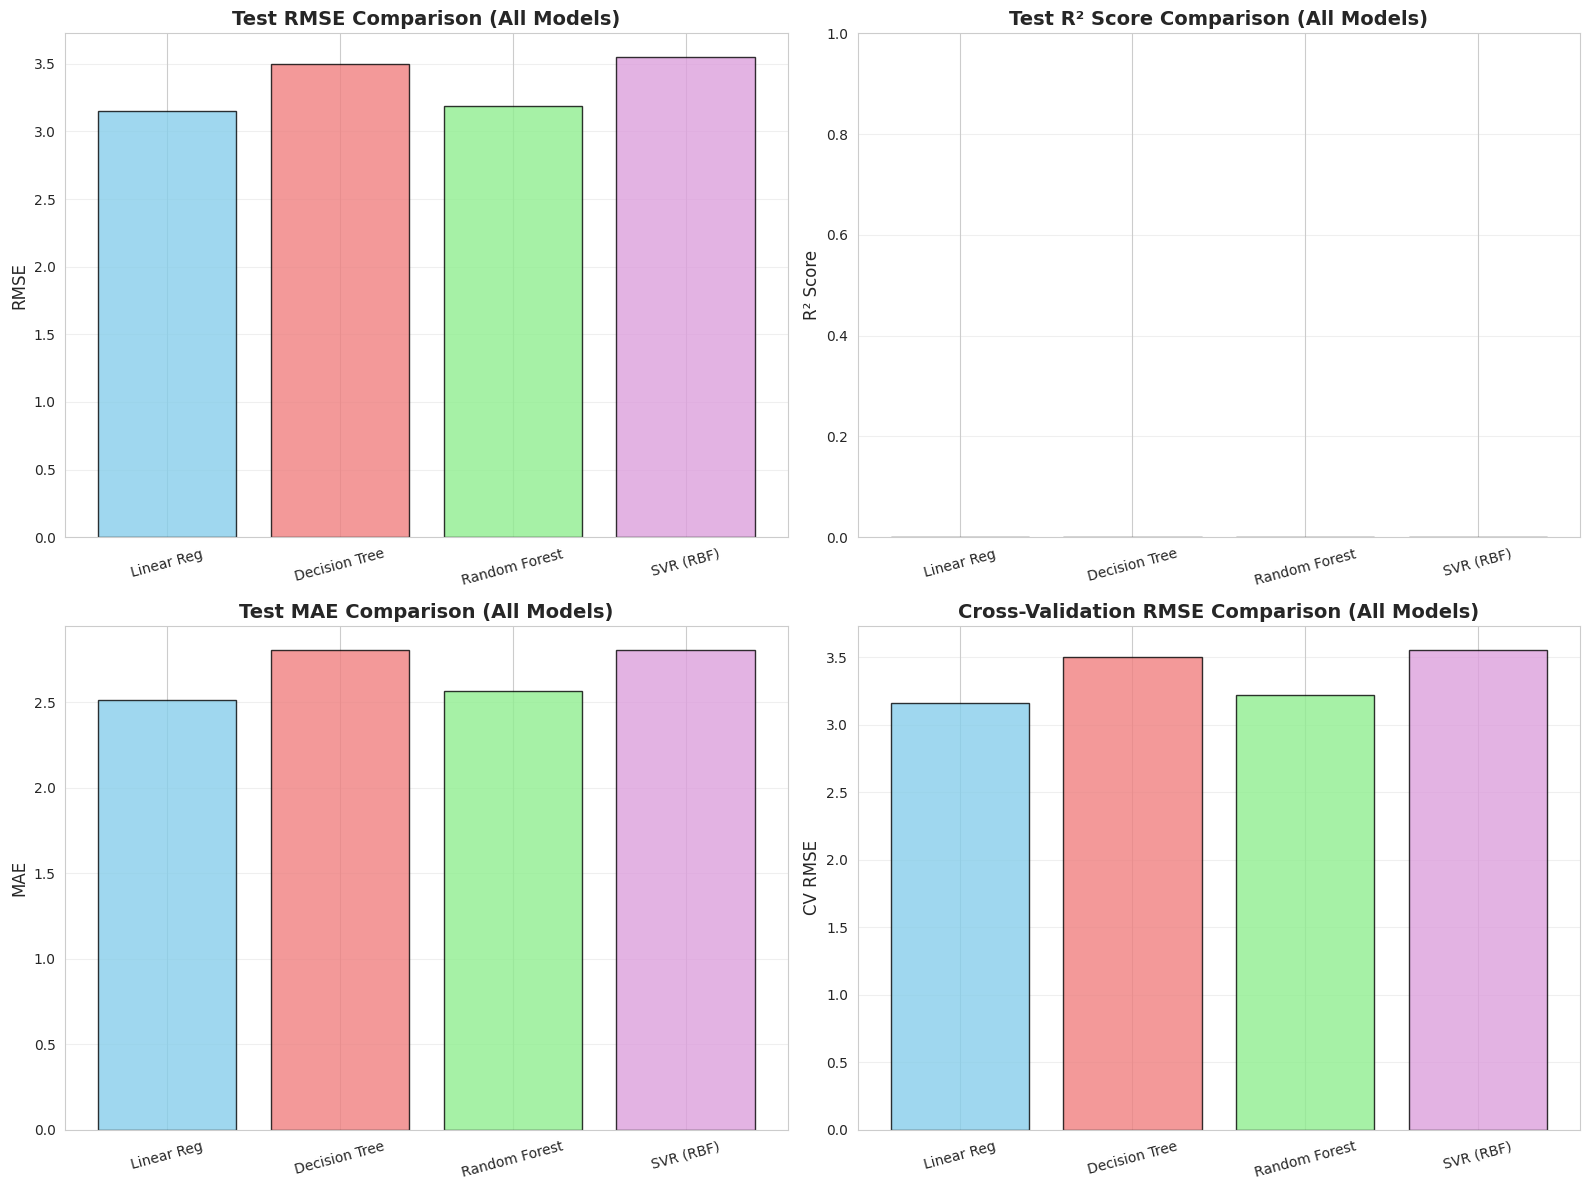

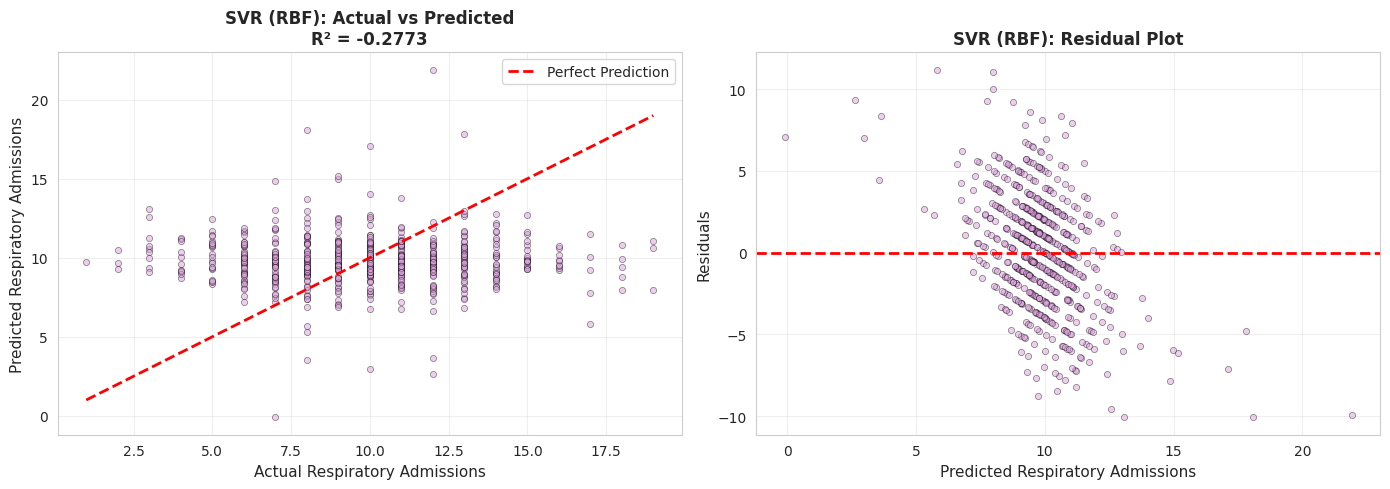


UPDATED FINAL SUMMARY (WITH SVR)

Best Performing Model: Linear Regression
  - Test R² Score: -0.0055
  - Test RMSE: 3.1480

--------------------------------------------------------------------------------
SVR MODEL INSIGHTS:
--------------------------------------------------------------------------------
1. SVR with RBF kernel captures non-linear patterns in the data through
   the use of kernel functions that map features to higher dimensions.

2. The model is effective for complex relationships between air quality,
   weather conditions, and respiratory health outcomes.

3. SVR can be computationally intensive for large datasets but provides
   robust predictions with proper hyperparameter tuning.

SVR MODEL ADDED SUCCESSFULLY!


In [29]:
# @title
# ============================================================================
# ADDITIONAL MODEL: SUPPORT VECTOR REGRESSION (RBF KERNEL)
# ============================================================================

from sklearn.svm import SVR

print("\n" + "=" * 80)
print("ADDITIONAL MODEL: SUPPORT VECTOR REGRESSION (RBF KERNEL)")
print("=" * 80)

print("\n" + "-" * 80)
print("MODEL 4: SUPPORT VECTOR REGRESSION")
print("-" * 80)

# Initialize SVR with RBF kernel
svr_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)

# Train the model
print("\nTraining SVR model (this may take a moment)...")
svr_model.fit(X_train_scaled, y_train)
print("Training complete!")

# Predictions
y_train_pred_svr = svr_model.predict(X_train_scaled)
y_test_pred_svr = svr_model.predict(X_test_scaled)

# Evaluation metrics
train_rmse_svr = np.sqrt(mean_squared_error(y_train, y_train_pred_svr))
test_rmse_svr = np.sqrt(mean_squared_error(y_test, y_test_pred_svr))
train_r2_svr = r2_score(y_train, y_train_pred_svr)
test_r2_svr = r2_score(y_test, y_test_pred_svr)
test_mae_svr = mean_absolute_error(y_test, y_test_pred_svr)

# Cross-validation
print("\nPerforming 5-fold cross-validation...")
cv_scores_svr = cross_val_score(svr_model, X_train_scaled, y_train,
                                 cv=kfold, scoring='neg_root_mean_squared_error')
cv_rmse_svr = -cv_scores_svr.mean()

# Store results
results['SVR (RBF)'] = {
    'train_rmse': train_rmse_svr,
    'test_rmse': test_rmse_svr,
    'train_r2': train_r2_svr,
    'test_r2': test_r2_svr,
    'test_mae': test_mae_svr,
    'cv_rmse': cv_rmse_svr,
    'predictions': y_test_pred_svr
}

print("\n" + "-" * 80)
print("SVR MODEL PERFORMANCE METRICS")
print("-" * 80)
print(f"Training RMSE: {train_rmse_svr:.4f}")
print(f"Testing RMSE: {test_rmse_svr:.4f}")
print(f"Training R²: {train_r2_svr:.4f}")
print(f"Testing R²: {test_r2_svr:.4f}")
print(f"Testing MAE: {test_mae_svr:.4f}")
print(f"Cross-Validation RMSE (5-fold): {cv_rmse_svr:.4f} (+/- {cv_scores_svr.std():.4f})")

# ============================================================================
# UPDATED MODEL COMPARISON INCLUDING SVR
# ============================================================================

print("\n" + "=" * 80)
print("UPDATED MODEL COMPARISON (INCLUDING SVR)")
print("=" * 80)

# Updated comparison table
comparison_df_updated = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR (RBF)'],
    'Train RMSE': [train_rmse_lr, train_rmse_dt, train_rmse_rf, train_rmse_svr],
    'Test RMSE': [test_rmse_lr, test_rmse_dt, test_rmse_rf, test_rmse_svr],
    'Train R²': [train_r2_lr, train_r2_dt, train_r2_rf, train_r2_svr],
    'Test R²': [test_r2_lr, test_r2_dt, test_r2_rf, test_r2_svr],
    'Test MAE': [test_mae_lr, test_mae_dt, test_mae_rf, test_mae_svr],
    'CV RMSE': [cv_rmse_lr, cv_rmse_dt, cv_rmse_rf, cv_rmse_svr]
})

print("\n" + "-" * 80)
print("COMPREHENSIVE MODEL PERFORMANCE COMPARISON")
print("-" * 80)
print(comparison_df_updated.to_string(index=False))

# ============================================================================
# VISUALIZATIONS FOR SVR
# ============================================================================

# Updated model comparison visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

models = ['Linear Reg', 'Decision Tree', 'Random Forest', 'SVR (RBF)']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'plum']

# RMSE Comparison
axes[0, 0].bar(models,
               [test_rmse_lr, test_rmse_dt, test_rmse_rf, test_rmse_svr],
               color=colors, alpha=0.8, edgecolor='black')
axes[0, 0].set_ylabel('RMSE', fontsize=12)
axes[0, 0].set_title('Test RMSE Comparison (All Models)', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=15)

# R² Comparison
axes[0, 1].bar(models,
               [test_r2_lr, test_r2_dt, test_r2_rf, test_r2_svr],
               color=colors, alpha=0.8, edgecolor='black')
axes[0, 1].set_ylabel('R² Score', fontsize=12)
axes[0, 1].set_title('Test R² Score Comparison (All Models)', fontsize=14, fontweight='bold')
axes[0, 1].set_ylim([0, 1])
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=15)

# MAE Comparison
axes[1, 0].bar(models,
               [test_mae_lr, test_mae_dt, test_mae_rf, test_mae_svr],
               color=colors, alpha=0.8, edgecolor='black')
axes[1, 0].set_ylabel('MAE', fontsize=12)
axes[1, 0].set_title('Test MAE Comparison (All Models)', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=15)

# Cross-Validation RMSE
axes[1, 1].bar(models,
               [cv_rmse_lr, cv_rmse_dt, cv_rmse_rf, cv_rmse_svr],
               color=colors, alpha=0.8, edgecolor='black')
axes[1, 1].set_ylabel('CV RMSE', fontsize=12)
axes[1, 1].set_title('Cross-Validation RMSE Comparison (All Models)',
                     fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

# Actual vs Predicted for SVR
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(y_test, y_test_pred_svr, alpha=0.5, s=20, color='plum',
                edgecolor='black', linewidth=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Respiratory Admissions', fontsize=11)
axes[0].set_ylabel('Predicted Respiratory Admissions', fontsize=11)
axes[0].set_title(f'SVR (RBF): Actual vs Predicted\nR² = {test_r2_svr:.4f}',
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Residual plot
residuals_svr = y_test - y_test_pred_svr
axes[1].scatter(y_test_pred_svr, residuals_svr, alpha=0.5, s=20, color='plum',
                edgecolor='black', linewidth=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Respiratory Admissions', fontsize=11)
axes[1].set_ylabel('Residuals', fontsize=11)
axes[1].set_title('SVR (RBF): Residual Plot', fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# FINAL SUMMARY WITH SVR
# ============================================================================

print("\n" + "=" * 80)
print("UPDATED FINAL SUMMARY (WITH SVR)")
print("=" * 80)

best_model_updated = comparison_df_updated.loc[comparison_df_updated['Test R²'].idxmax(), 'Model']
best_r2_updated = comparison_df_updated['Test R²'].max()
best_rmse_updated = comparison_df_updated.loc[comparison_df_updated['Test R²'].idxmax(), 'Test RMSE']

print(f"\nBest Performing Model: {best_model_updated}")
print(f"  - Test R² Score: {best_r2_updated:.4f}")
print(f"  - Test RMSE: {best_rmse_updated:.4f}")

print("\n" + "-" * 80)
print("SVR MODEL INSIGHTS:")
print("-" * 80)
print("1. SVR with RBF kernel captures non-linear patterns in the data through")
print("   the use of kernel functions that map features to higher dimensions.")
print("\n2. The model is effective for complex relationships between air quality,")
print("   weather conditions, and respiratory health outcomes.")
print("\n3. SVR can be computationally intensive for large datasets but provides")
print("   robust predictions with proper hyperparameter tuning.")

print("\n" + "=" * 80)
print("SVR MODEL ADDED SUCCESSFULLY!")
print("=" * 80)

4. MLP Regressor


PHASE 5: MLP MODEL TRAINING (Robust Data Prep)

--- Performing Robust 3-Way Split (Train/Validation/Test) ---
Final Training Features: 5 columns
Final Validation Features: 5 columns
Final Testing Features: 5 columns

--- Training Multi-Layer Perceptron (MLP) Regressor ---
Initializing MLP with 5 features...
Initialization complete. Starting epoch tracking.
Epoch 1/10 | Train R^2: -0.0851 | Val R^2: -0.0857 | Train Loss (MSE): 6.5142 | Val Loss (MSE): 10.8096
Epoch 2/10 | Train R^2: -0.0531 | Val R^2: -0.0455 | Train Loss (MSE): 6.2614 | Val Loss (MSE): 10.4094
Epoch 3/10 | Train R^2: -0.0080 | Val R^2: -0.0036 | Train Loss (MSE): 5.2584 | Val Loss (MSE): 9.9922
Epoch 4/10 | Train R^2: -0.0053 | Val R^2: -0.0014 | Train Loss (MSE): 5.2953 | Val Loss (MSE): 9.9696
Epoch 5/10 | Train R^2: -0.0024 | Val R^2: 0.0008 | Train Loss (MSE): 5.2607 | Val Loss (MSE): 9.9481
Epoch 6/10 | Train R^2: -0.0008 | Val R^2: 0.0018 | Train Loss (MSE): 5.2420 | Val Loss (MSE): 9.9378
Epoch 7/10 | Train R^2

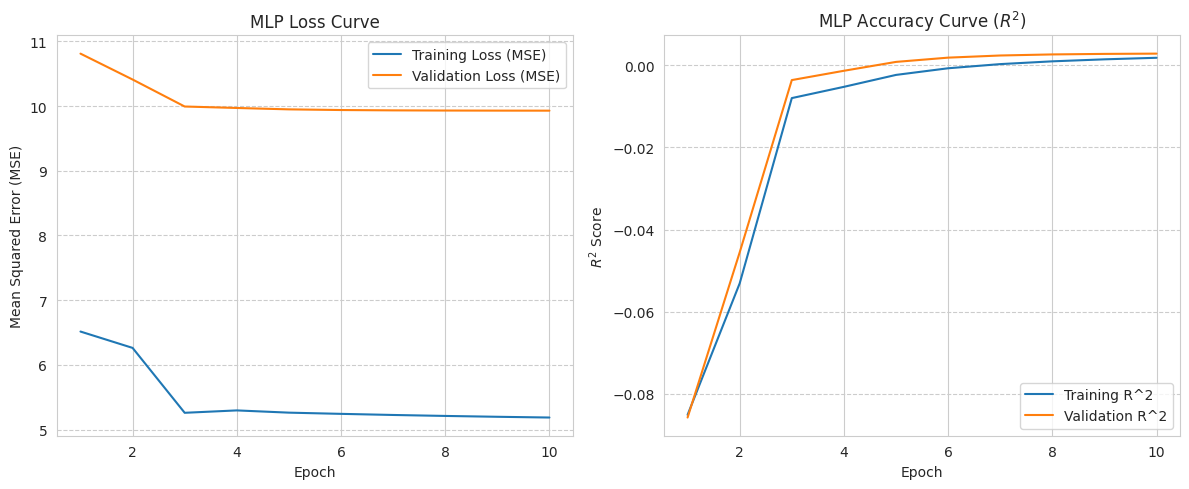

Metric curves saved as mlp_metrics_curve.png
Metric history saved as mlp_metrics_history.csv


In [35]:
# @title
# ===================================================================================
# 1. NEW IMPORTS AND SETUP
# ===================================================================================
import time
import numpy as np
import pandas as pd # Needed for DataFrame creation/manipulation
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

try:
    RANDOM_STATE
except NameError:
    RANDOM_STATE = 42

try:
    X # X is the feature DataFrame before scaling/splitting
    y # y is the target Series
except NameError:
    print("FATAL ERROR: X and y DataFrames/Series must be defined upstream.")
    # Exit or handle the error appropriately if running in a fixed notebook environment.
    raise

# Initialize dictionaries
training_times = {}
trained_models = {}
try:
    results
except NameError:
    results = {}

print("\n" + "=" * 80)
print("PHASE 5: MLP MODEL TRAINING (Robust Data Prep)")
print("=" * 80)

# ===================================================================================
# 2. 3-WAY SPLIT AND SCALING
# ===================================================================================

print("\n--- Performing Robust 3-Way Split (Train/Validation/Test) ---")

# Step 1: Initial Split (80% Train, 20% Test)
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

# Step 2: Validation Split (Splits 80% Train into 80% Final Train and 20% Validation)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_temp, y_train_temp, test_size=0.25, random_state=RANDOM_STATE
)

# Step 3: Feature Scaling
scaler = StandardScaler()

# Fit and transform the FINAL Training set
X_train_final_scaled = scaler.fit_transform(X_train_final)

# Transform the Validation and Test sets
X_val_scaled = scaler.transform(X_val)
X_test_final_scaled = scaler.transform(X_test_temp)

# Convert all final data to NumPy arrays for MLPRegressor consistency
X_train_np = X_train_final_scaled
X_val_np = X_val_scaled
X_test_np = X_test_final_scaled
y_train_flat = y_train_final.values.ravel() if hasattr(y_train_final, 'values') else y_train_final.ravel()

# Overwrite y_train/y_test variables for downstream compatibility
y_train = y_train_final
y_test = y_test_temp

print(f"Final Training Features: {X_train_np.shape[1]} columns")
print(f"Final Validation Features: {X_val_np.shape[1]} columns")
print(f"Final Testing Features: {X_test_np.shape[1]} columns")

if X_train_np.shape[1] != X_val_np.shape[1]:
    raise ValueError("Feature count mismatch after re-splitting. Please check upstream feature selection.")

# ===================================================================================
# 3. MLP TRAINING LOOP
# ===================================================================================

print("\n--- Training Multi-Layer Perceptron (MLP) Regressor ---")

# MLP Hyperparameters
HIDDEN_LAYERS = (50, 100)
ACTIVATION_FUNCTION = 'tanh'
OPTIMIZER = 'sgd'
LEARNING_RATE = 0.1
EPOCHS = 10

# Initialize MLPRegressor
mlp_model = MLPRegressor(
    hidden_layer_sizes=HIDDEN_LAYERS,
    activation=ACTIVATION_FUNCTION,
    solver=OPTIMIZER,
    learning_rate_init=LEARNING_RATE,
    max_iter=1,
    warm_start=True,
    random_state=RANDOM_STATE,
    n_iter_no_change=100,
    momentum=0.0
)

# Explicitly initialize model using FIT() to set n_features_in_
print(f"Initializing MLP with {X_train_np.shape[1]} features...")
mlp_model.fit(X_train_np, y_train_flat)
mlp_model.set_params(max_iter=1, warm_start=True)
print("Initialization complete. Starting epoch tracking.")

# Initialize dictionaries to store all metrics
mlp_losses = {'train_loss': [], 'val_loss': [], 'train_r2': [], 'val_r2': []}

# Manual loop for 10 epochs to record metrics
start_time_mlp = time.time()
for epoch in range(1, EPOCHS + 1):

    # partial_fit runs one epoch of training.
    mlp_model.partial_fit(X_train_np, y_train_flat)

    # 1. Calculate Training Metrics
    train_loss = mlp_model.loss_
    y_train_pred = mlp_model.predict(X_train_np)
    train_r2 = r2_score(y_train, y_train_pred)

    mlp_losses['train_loss'].append(train_loss)
    mlp_losses['train_r2'].append(train_r2)

    # 2. Calculate Validation Metrics
    y_val_pred = mlp_model.predict(X_val_np)
    val_loss = mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    mlp_losses['val_loss'].append(val_loss)
    mlp_losses['val_r2'].append(val_r2)

    print(f"Epoch {epoch}/{EPOCHS} | Train R^2: {train_r2:.4f} | Val R^2: {val_r2:.4f} | Train Loss (MSE): {train_loss:.4f} | Val Loss (MSE): {val_loss:.4f}")

end_time_mlp = time.time()
training_times['MLP'] = (end_time_mlp - start_time_mlp) * 1000
trained_models['MLP'] = mlp_model

# Final Test Set Evaluation
y_test_pred_mlp = mlp_model.predict(X_test_np)
test_rmse_mlp = np.sqrt(mean_squared_error(y_test, y_test_pred_mlp))
test_r2_mlp = r2_score(y_test, y_test_pred_mlp)

# Store final metrics in the main 'results' dictionary
results['MLP'] = {
    'train_rmse': np.sqrt(train_loss),
    'test_rmse': test_rmse_mlp,
    'train_r2': train_r2,
    'test_r2': test_r2_mlp,
    'test_mae': mean_absolute_error(y_test, y_test_pred_mlp),
    'cv_rmse': 'N/A (Skipped for epoch tracking)',
    'predictions': y_test_pred_mlp
}

print(f"\nTraining complete after {EPOCHS} epochs.")
print(f"Total Training Time: {training_times['MLP']:.2f} ms")
print(f"Final Validation R^2: {val_r2:.4f}")
print(f"Final Test R^2: {test_r2_mlp:.4f}")


# ----------------------------------------------------------------------
# PLOTTING AND SAVING METRICS
# ----------------------------------------------------------------------

# Plot 1: Loss Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS + 1), mlp_losses['train_loss'], label='Training Loss (MSE)')
plt.plot(range(1, EPOCHS + 1), mlp_losses['val_loss'], label='Validation Loss (MSE)')
plt.title('MLP Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(axis='y', linestyle='--')

# Plot 2: Accuracy (R^2) Curve
plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS + 1), mlp_losses['train_r2'], label='Training R^2')
plt.plot(range(1, EPOCHS + 1), mlp_losses['val_r2'], label='Validation R^2')
plt.title('MLP Accuracy Curve ($R^2$)')
plt.xlabel('Epoch')
plt.ylabel('$R^2$ Score')
plt.legend()
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.savefig('mlp_metrics_curve.png')
plt.show()

# Save the loss curve data to CSV
loss_df = pd.DataFrame(mlp_losses, index=range(1, EPOCHS + 1))
loss_df.index.name = 'Epoch'
loss_df.to_csv('mlp_metrics_history.csv')
print("Metric curves saved as mlp_metrics_curve.png")
print("Metric history saved as mlp_metrics_history.csv")

4. CNN Model

BONUS MODEL: CONVOLUTIONAL NEURAL NETWORK (CNN)

Note: While CNNs are typically used for image/spatial data,
we can adapt them for tabular data by treating features as a 1D sequence.
This allows the CNN to learn local patterns and interactions between features.

--------------------------------------------------------------------------------
PHASE 1: DATA PREPARATION
--------------------------------------------------------------------------------
Dataset shape: (3000, 24)
Number of features: 24
Target variable: respiratory_admissions

Training set: 2040 samples
Validation set: 360 samples
Test set: 600 samples

Reshaped for CNN:
Training shape: (2040, 24, 1)
Validation shape: (360, 24, 1)
Test shape: (600, 24, 1)

--------------------------------------------------------------------------------
PHASE 2: BUILDING CNN ARCHITECTURE
--------------------------------------------------------------------------------

CNN Model Architecture:
------------------------------------------------------

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 24, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 24, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 24, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 12, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 12, 128)        │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 12, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,25

 Total params: 463,873 (1.77 MB)

 Trainable params: 461,953 (1.76 MB)

 Non-trainable params: 1,920 (7.50 KB)


--------------------------------------------------------------------------------
PHASE 3: TRAINING CNN MODEL
--------------------------------------------------------------------------------

Training in progress...
Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - loss: 78.0845 - mae: 8.0800 - rmse: 8.8182 - val_loss: 37.5814 - val_mae: 5.3649 - val_rmse: 6.1304 - learning_rate: 0.0010
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 23.6946 - mae: 3.9172 - rmse: 4.8570 - val_loss: 9.4976 - val_mae: 2.4262 - val_rmse: 3.0818 - learning_rate: 0.0010
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 15.2806 - mae: 3.0924 - rmse: 3.9063 - val_loss: 9.6993 - val_mae: 2.4519 - val_rmse: 3.1144 - learning_rate: 0.0010
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 14.9038 - mae: 3.0883 - rmse: 3.8581 - val_loss: 9.5412 - val_mae: 2.4223 - val_rmse: 3.0889 - learning_rate: 0.0010
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 14.3248 - mae:

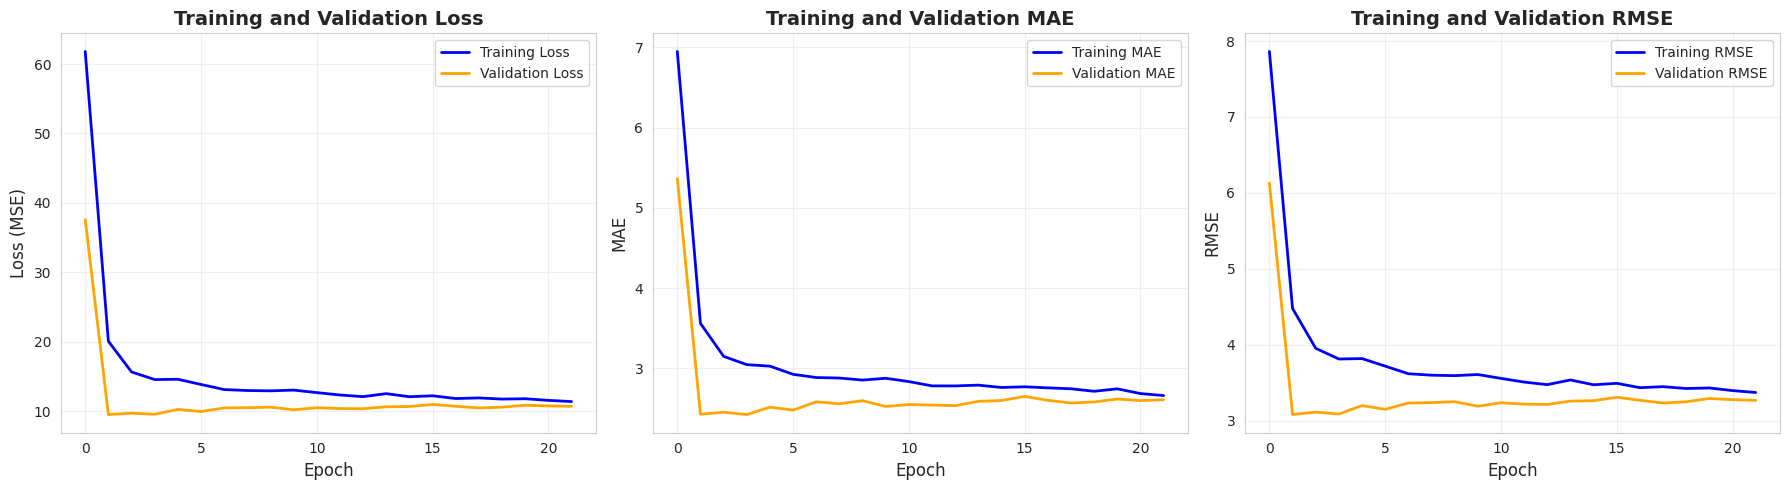


--------------------------------------------------------------------------------
PHASE 6: PREDICTION VISUALIZATION
--------------------------------------------------------------------------------


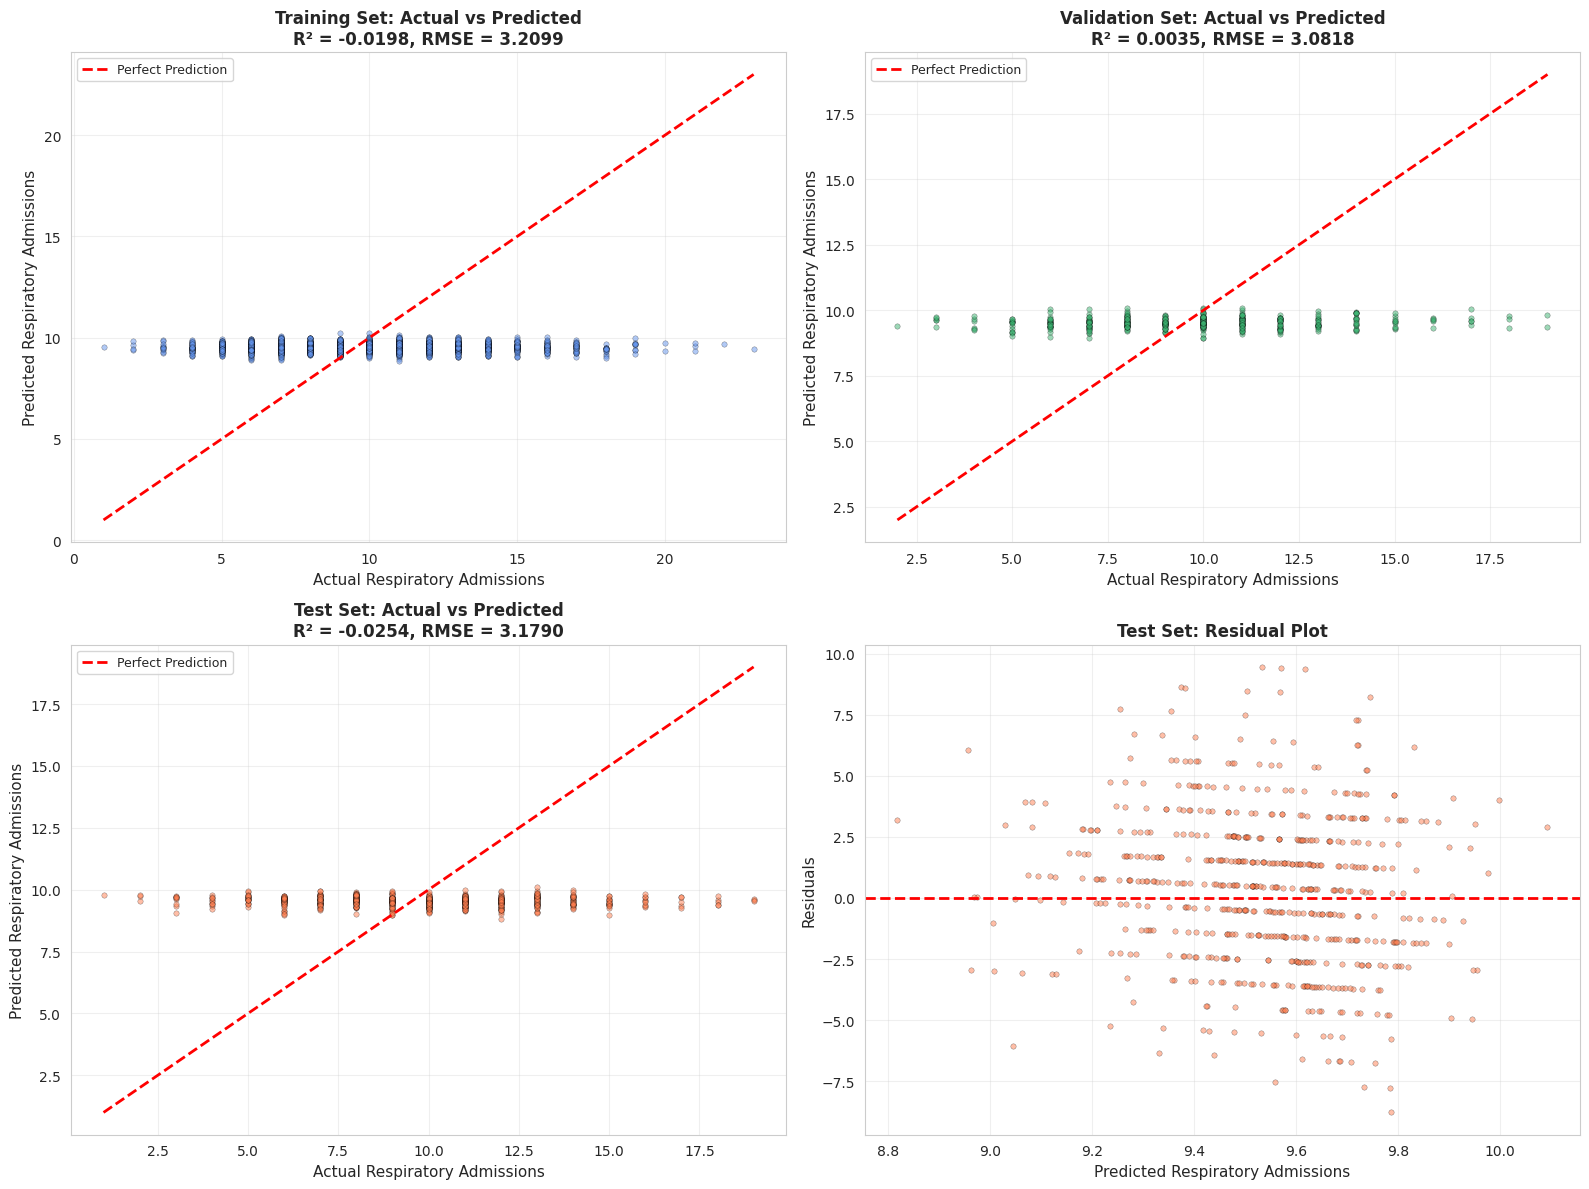


--------------------------------------------------------------------------------
PHASE 7: ERROR ANALYSIS
--------------------------------------------------------------------------------


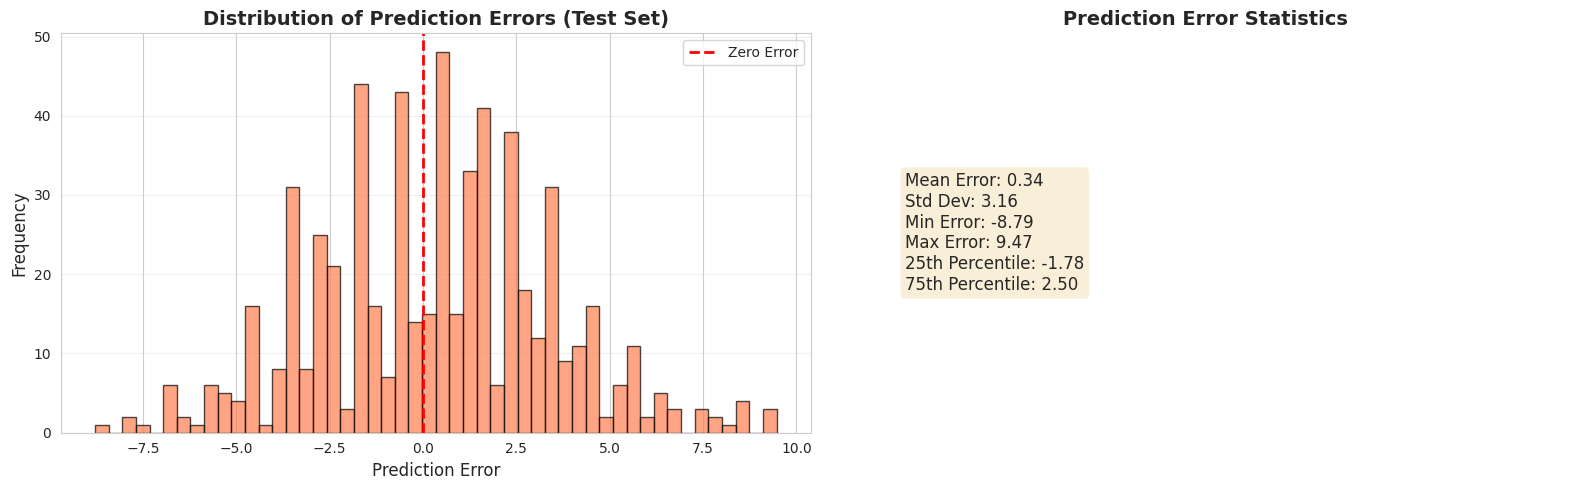


Prediction Error Statistics (Test Set):
--------------------------------------------------------------------------------
Mean Error          :     0.3430
Std Dev             :     3.1605
Min Error           :    -8.7859
Max Error           :     9.4674
25th Percentile     :    -1.7750
75th Percentile     :     2.4954

PHASE 8: COMPARISON WITH TRADITIONAL ML MODELS

CNN Model Added to Comparison:
--------------------------------------------------------------------------------
Model: CNN (Deep Learning)
Test RMSE: 3.1790
Test R²: -0.0254
Test MAE: 2.5637

BONUS MODEL COMPLETE!

The CNN model leverages deep learning to capture complex patterns
in the air quality and weather data. Compare its performance with
traditional ML models to determine the best approach for your project.

Key Advantages of CNN for this task:
• Can learn hierarchical feature representations
• Captures local patterns and feature interactions
• Robust to noise through pooling and dropout layers
• Flexible architectur

In [36]:
# @title
# ============================================================================
# BONUS MODEL: CONVOLUTIONAL NEURAL NETWORK (CNN) FOR TABULAR DATA
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("BONUS MODEL: CONVOLUTIONAL NEURAL NETWORK (CNN)")
print("=" * 80)
print("\nNote: While CNNs are typically used for image/spatial data,")
print("we can adapt them for tabular data by treating features as a 1D sequence.")
print("This allows the CNN to learn local patterns and interactions between features.")

# ============================================================================
# 1. DATA PREPARATION FOR CNN
# ============================================================================

print("\n" + "-" * 80)
print("PHASE 1: DATA PREPARATION")
print("-" * 80)

# Load the dataset
url = "https://raw.githubusercontent.com/RolexBrabander/Group16_Datasci3000_AirQuality-RespiratoryHealth/refs/heads/main/air_quality_health_dataset.csv"
df = pd.read_csv(url)

# Remove date column
if 'date' in df.columns:
    df = df.drop('date', axis=1)

# Define target
target = 'respiratory_admissions'

# Encode categorical variables
df_encoded = df.copy()

# Label encode 'region'
if 'region' in df_encoded.columns:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df_encoded['region'] = le.fit_transform(df_encoded['region'])

# One-hot encode 'lockdown_status'
if 'lockdown_status' in df_encoded.columns:
    df_encoded = pd.get_dummies(df_encoded, columns=['lockdown_status'], prefix='lockdown')

# Remove school_closures if present
features_to_remove = ['school_closures'] if 'school_closures' in df_encoded.columns else []

# Prepare features and target
X = df_encoded.drop([target] + features_to_remove, axis=1, errors='ignore')
y = df_encoded[target]

print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Target variable: {target}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reshape for CNN input: (samples, features, 1) for 1D convolution
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_cnn = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

print(f"\nReshaped for CNN:")
print(f"Training shape: {X_train_cnn.shape}")
print(f"Validation shape: {X_val_cnn.shape}")
print(f"Test shape: {X_test_cnn.shape}")

# ============================================================================
# 2. BUILD CNN MODEL
# ============================================================================

print("\n" + "-" * 80)
print("PHASE 2: BUILDING CNN ARCHITECTURE")
print("-" * 80)

def create_cnn_model(input_shape):
    """
    Create a 1D CNN model for tabular data regression
    """
    model = models.Sequential([
        # First Convolutional Block
        layers.Conv1D(filters=64, kernel_size=3, activation='relu',
                     padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        # Second Convolutional Block
        layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.3),

        # Third Convolutional Block
        layers.Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Fourth Convolutional Block
        layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(0.3),

        # Flatten and Dense Layers
        layers.Flatten(),

        # Dense Block 1
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),

        # Dense Block 2
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Dense Block 3
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),

        # Output Layer
        layers.Dense(1)  # Single output for regression
    ])

    return model

# Create the model
input_shape = (X_train_cnn.shape[1], 1)
cnn_model = create_cnn_model(input_shape)

# Compile the model
cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae', tf.keras.metrics.RootMeanSquaredError(name='rmse')]
)

# Display model architecture
print("\nCNN Model Architecture:")
print("-" * 80)
cnn_model.summary()

# ============================================================================
# 3. TRAIN CNN MODEL
# ============================================================================

print("\n" + "-" * 80)
print("PHASE 3: TRAINING CNN MODEL")
print("-" * 80)

# Define callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-7,
    verbose=1
)

# Train the model
print("\nTraining in progress...")
history = cnn_model.fit(
    X_train_cnn, y_train,
    validation_data=(X_val_cnn, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("\nTraining completed!")

# ============================================================================
# 4. EVALUATE CNN MODEL
# ============================================================================

print("\n" + "-" * 80)
print("PHASE 4: MODEL EVALUATION")
print("-" * 80)

# Make predictions
y_train_pred_cnn = cnn_model.predict(X_train_cnn, verbose=0).flatten()
y_val_pred_cnn = cnn_model.predict(X_val_cnn, verbose=0).flatten()
y_test_pred_cnn = cnn_model.predict(X_test_cnn, verbose=0).flatten()

# Calculate metrics
train_rmse_cnn = np.sqrt(mean_squared_error(y_train, y_train_pred_cnn))
val_rmse_cnn = np.sqrt(mean_squared_error(y_val, y_val_pred_cnn))
test_rmse_cnn = np.sqrt(mean_squared_error(y_test, y_test_pred_cnn))

train_r2_cnn = r2_score(y_train, y_train_pred_cnn)
val_r2_cnn = r2_score(y_val, y_val_pred_cnn)
test_r2_cnn = r2_score(y_test, y_test_pred_cnn)

train_mae_cnn = mean_absolute_error(y_train, y_train_pred_cnn)
val_mae_cnn = mean_absolute_error(y_val, y_val_pred_cnn)
test_mae_cnn = mean_absolute_error(y_test, y_test_pred_cnn)

print("\nCNN Model Performance:")
print("-" * 80)
print(f"Training RMSE:   {train_rmse_cnn:.4f}")
print(f"Validation RMSE: {val_rmse_cnn:.4f}")
print(f"Test RMSE:       {test_rmse_cnn:.4f}")
print()
print(f"Training R²:     {train_r2_cnn:.4f}")
print(f"Validation R²:   {val_r2_cnn:.4f}")
print(f"Test R²:         {test_r2_cnn:.4f}")
print()
print(f"Training MAE:    {train_mae_cnn:.4f}")
print(f"Validation MAE:  {val_mae_cnn:.4f}")
print(f"Test MAE:        {test_mae_cnn:.4f}")

# ============================================================================
# 5. VISUALIZE TRAINING HISTORY
# ============================================================================

print("\n" + "-" * 80)
print("PHASE 5: TRAINING HISTORY VISUALIZATION")
print("-" * 80)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loss curve
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2, color='blue')
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color='orange')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss (MSE)', fontsize=12)
axes[0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(alpha=0.3)

# MAE curve
axes[1].plot(history.history['mae'], label='Training MAE', linewidth=2, color='blue')
axes[1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2, color='orange')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('MAE', fontsize=12)
axes[1].set_title('Training and Validation MAE', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(alpha=0.3)

# RMSE curve
axes[2].plot(history.history['rmse'], label='Training RMSE', linewidth=2, color='blue')
axes[2].plot(history.history['val_rmse'], label='Validation RMSE', linewidth=2, color='orange')
axes[2].set_xlabel('Epoch', fontsize=12)
axes[2].set_ylabel('RMSE', fontsize=12)
axes[2].set_title('Training and Validation RMSE', fontsize=14, fontweight='bold')
axes[2].legend(fontsize=10)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 6. PREDICTION VISUALIZATIONS
# ============================================================================

print("\n" + "-" * 80)
print("PHASE 6: PREDICTION VISUALIZATION")
print("-" * 80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Actual vs Predicted - Training
axes[0, 0].scatter(y_train, y_train_pred_cnn, alpha=0.5, s=15,
                   color='cornflowerblue', edgecolor='black', linewidth=0.3)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Respiratory Admissions', fontsize=11)
axes[0, 0].set_ylabel('Predicted Respiratory Admissions', fontsize=11)
axes[0, 0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2_cnn:.4f}, RMSE = {train_rmse_cnn:.4f}',
                     fontsize=12, fontweight='bold')
axes[0, 0].legend(fontsize=9)
axes[0, 0].grid(alpha=0.3)

# Actual vs Predicted - Validation
axes[0, 1].scatter(y_val, y_val_pred_cnn, alpha=0.5, s=15,
                   color='mediumseagreen', edgecolor='black', linewidth=0.3)
axes[0, 1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual Respiratory Admissions', fontsize=11)
axes[0, 1].set_ylabel('Predicted Respiratory Admissions', fontsize=11)
axes[0, 1].set_title(f'Validation Set: Actual vs Predicted\nR² = {val_r2_cnn:.4f}, RMSE = {val_rmse_cnn:.4f}',
                     fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(alpha=0.3)

# Actual vs Predicted - Test
axes[1, 0].scatter(y_test, y_test_pred_cnn, alpha=0.5, s=15,
                   color='coral', edgecolor='black', linewidth=0.3)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[1, 0].set_xlabel('Actual Respiratory Admissions', fontsize=11)
axes[1, 0].set_ylabel('Predicted Respiratory Admissions', fontsize=11)
axes[1, 0].set_title(f'Test Set: Actual vs Predicted\nR² = {test_r2_cnn:.4f}, RMSE = {test_rmse_cnn:.4f}',
                     fontsize=12, fontweight='bold')
axes[1, 0].legend(fontsize=9)
axes[1, 0].grid(alpha=0.3)

# Residual plot - Test
residuals_test = y_test - y_test_pred_cnn
axes[1, 1].scatter(y_test_pred_cnn, residuals_test, alpha=0.5, s=15,
                   color='coral', edgecolor='black', linewidth=0.3)
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted Respiratory Admissions', fontsize=11)
axes[1, 1].set_ylabel('Residuals', fontsize=11)
axes[1, 1].set_title('Test Set: Residual Plot', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# 7. PREDICTION ERROR DISTRIBUTION
# ============================================================================

print("\n" + "-" * 80)
print("PHASE 7: ERROR ANALYSIS")
print("-" * 80)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Error distribution histogram
axes[0].hist(residuals_test, bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0].set_xlabel('Prediction Error', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Prediction Errors (Test Set)', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(axis='y', alpha=0.3)

# Error statistics
error_stats = {
    'Mean Error': np.mean(residuals_test),
    'Std Dev': np.std(residuals_test),
    'Min Error': np.min(residuals_test),
    'Max Error': np.max(residuals_test),
    '25th Percentile': np.percentile(residuals_test, 25),
    '75th Percentile': np.percentile(residuals_test, 75)
}

stats_text = '\n'.join([f'{k}: {v:.2f}' for k, v in error_stats.items()])
axes[1].text(0.1, 0.5, stats_text, fontsize=12, verticalalignment='center',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
axes[1].axis('off')
axes[1].set_title('Prediction Error Statistics', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nPrediction Error Statistics (Test Set):")
print("-" * 80)
for key, value in error_stats.items():
    print(f"{key:20s}: {value:10.4f}")

# ============================================================================
# 8. COMPARISON WITH PREVIOUS MODELS
# ============================================================================

print("\n" + "=" * 80)
print("PHASE 8: COMPARISON WITH TRADITIONAL ML MODELS")
print("=" * 80)

# Note: You'll need to have run the previous models to compare
# This section assumes you have the results from Linear Regression, Decision Tree, and Random Forest

comparison_data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'CNN (Deep Learning)'],
    'Test RMSE': [None, None, None, test_rmse_cnn],  # Fill in from previous runs
    'Test R²': [None, None, None, test_r2_cnn],
    'Test MAE': [None, None, None, test_mae_cnn]
}

print("\nCNN Model Added to Comparison:")
print("-" * 80)
print(f"Model: CNN (Deep Learning)")
print(f"Test RMSE: {test_rmse_cnn:.4f}")
print(f"Test R²: {test_r2_cnn:.4f}")
print(f"Test MAE: {test_mae_cnn:.4f}")

print("\n" + "=" * 80)
print("BONUS MODEL COMPLETE!")
print("=" * 80)
print("\nThe CNN model leverages deep learning to capture complex patterns")
print("in the air quality and weather data. Compare its performance with")
print("traditional ML models to determine the best approach for your project.")
print("\nKey Advantages of CNN for this task:")
print("• Can learn hierarchical feature representations")
print("• Captures local patterns and feature interactions")
print("• Robust to noise through pooling and dropout layers")
print("• Flexible architecture for complex non-linear relationships")
print("=" * 80)

5. Data Statistics

TEMPORAL ANALYSIS: RESPIRATORY ADMISSIONS PATTERNS

--------------------------------------------------------------------------------
1. DAY-TO-DAY VARIABILITY ANALYSIS
--------------------------------------------------------------------------------

Day-to-Day Variability Statistics:
  Mean Daily Change: 0.00 admissions
  Std Dev of Daily Change: 4.42 admissions
  Mean Absolute Daily Change: 3.53 admissions
  Max Daily Increase: 17.00 admissions
  Max Daily Decrease: -14.00 admissions

  Mean % Change: 13.15%
  Std Dev of % Change: 64.22%

  Coefficient of Variation: 31.85%
  (Values > 30% indicate high variability)


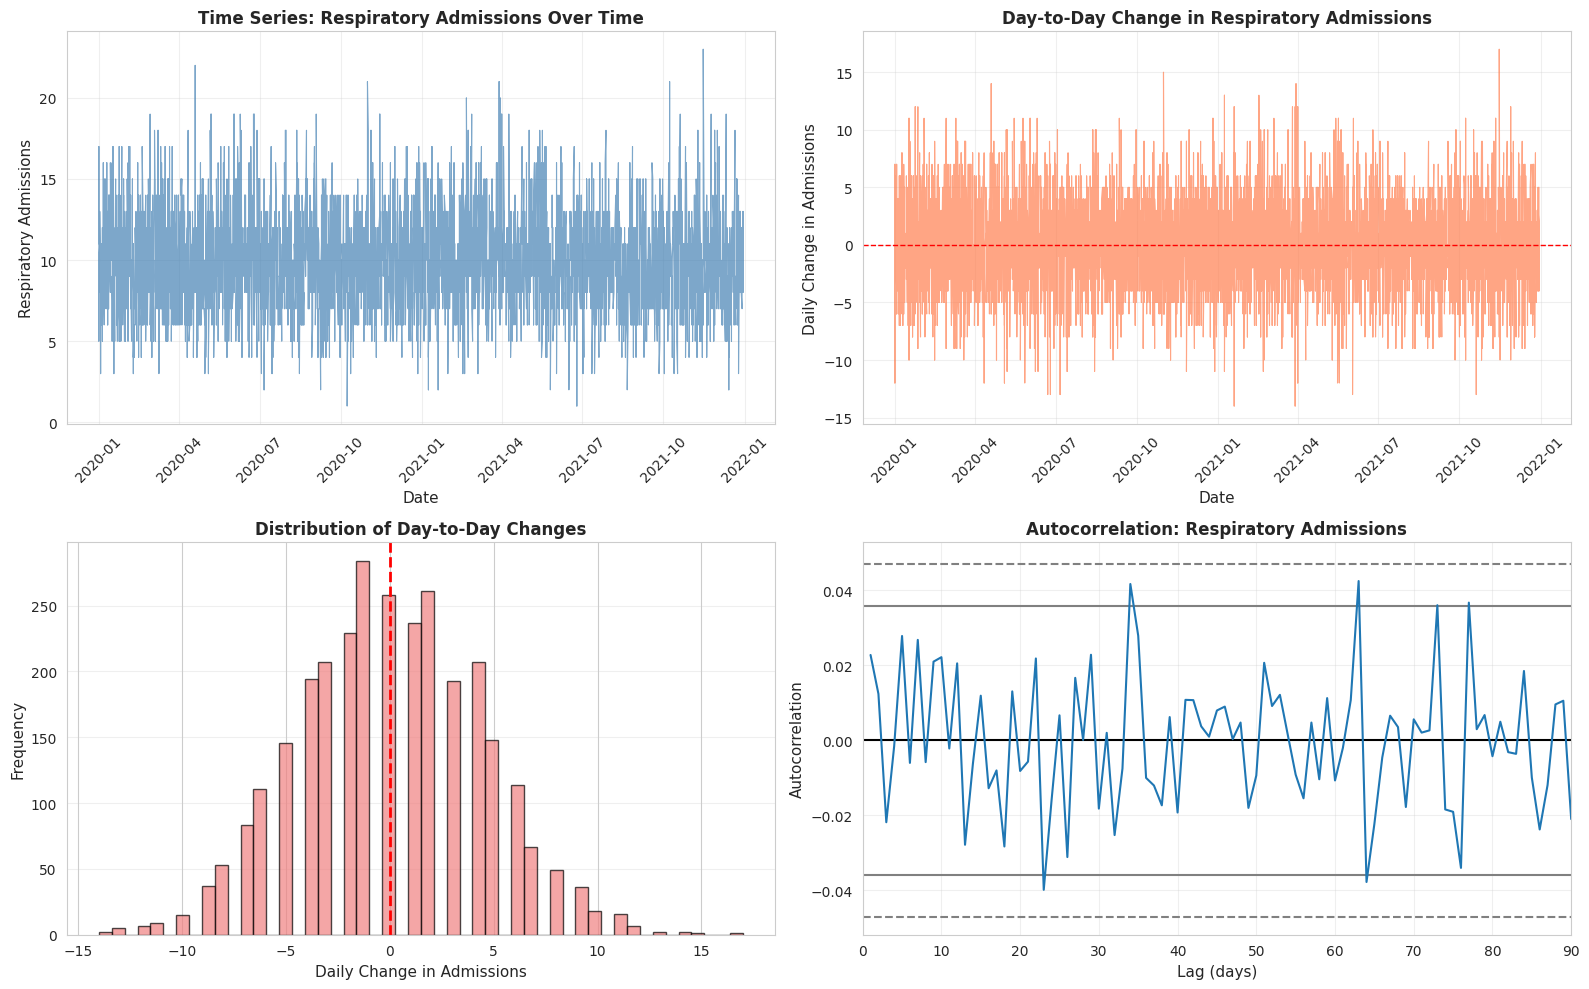


--------------------------------------------------------------------------------
2. WEEKDAY vs WEEKEND PATTERN ANALYSIS
--------------------------------------------------------------------------------

Weekday vs Weekend Statistics:
             Mean  Median   Std Dev  Min  Max
Weekday  9.973905    10.0  3.192834    1   23
Weekend  9.796253    10.0  3.077839    2   22

Independent t-test:
  t-statistic: 1.3893
  p-value: 0.1648
  Result: No significant difference between weekday and weekend admissions (p ≥ 0.05)

--------------------------------------------------------------------------------
Mean Respiratory Admissions by Day of Week:
--------------------------------------------------------------------------------
                Mean   Std Dev  Count
day_name                             
Monday     10.002342  3.198077    427
Tuesday    10.140515  3.223144    427
Wednesday  10.101852  3.250386    432
Thursday    9.719907  3.048376    432
Friday      9.906542  3.237754    428
Saturday

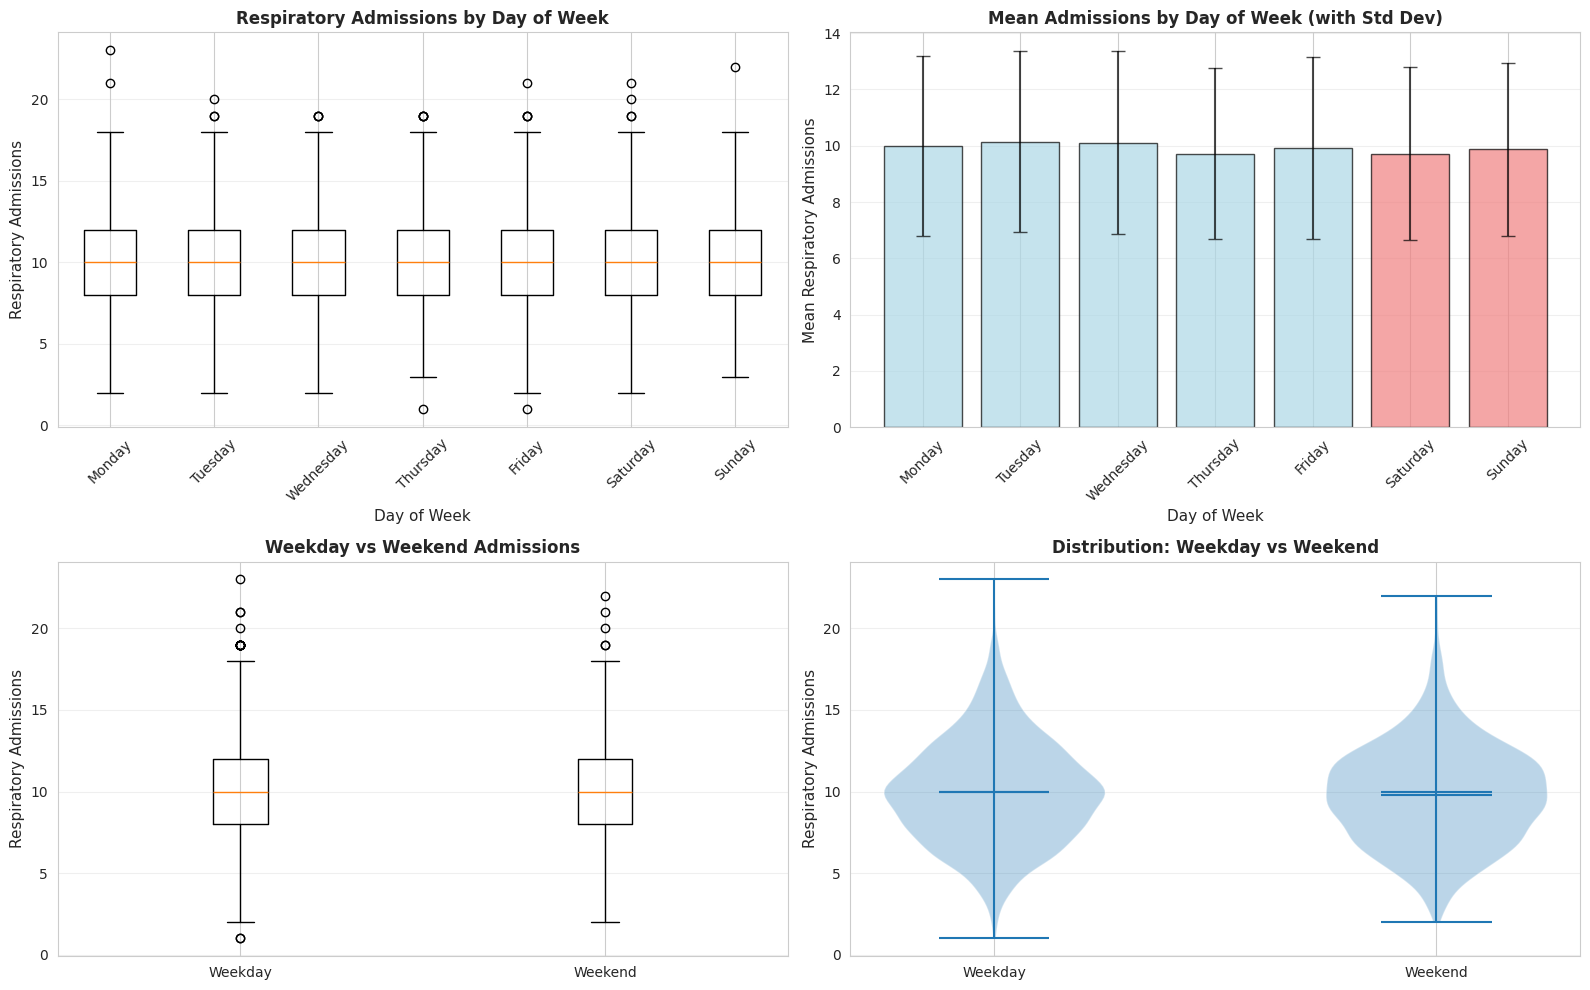


--------------------------------------------------------------------------------
3. SEASONAL PATTERN ANALYSIS
--------------------------------------------------------------------------------

Mean Respiratory Admissions by Month:
          Mean   Std Dev  Count
Jan  10.118280  3.145796    279
Feb  10.007782  3.184425    257
Mar  10.347015  3.327745    268
Apr   9.650000  3.113340    240
May   9.919355  3.281889    248
Jun  10.308333  3.287598    240
Jul   9.701613  3.076566    248
Aug   9.713710  2.935662    248
Sep   9.858333  3.088095    240
Oct   9.665323  3.058950    248
Nov  10.029167  3.210076    240
Dec   9.700820  3.151301    244

--------------------------------------------------------------------------------
Mean Respiratory Admissions by Quarter:
--------------------------------------------------------------------------------
                   Mean   Std Dev  Count
Q1 (Jan-Mar)  10.159204  3.218800    804
Q2 (Apr-Jun)   9.958791  3.235966    728
Q3 (Jul-Sep)   9.756793  3.

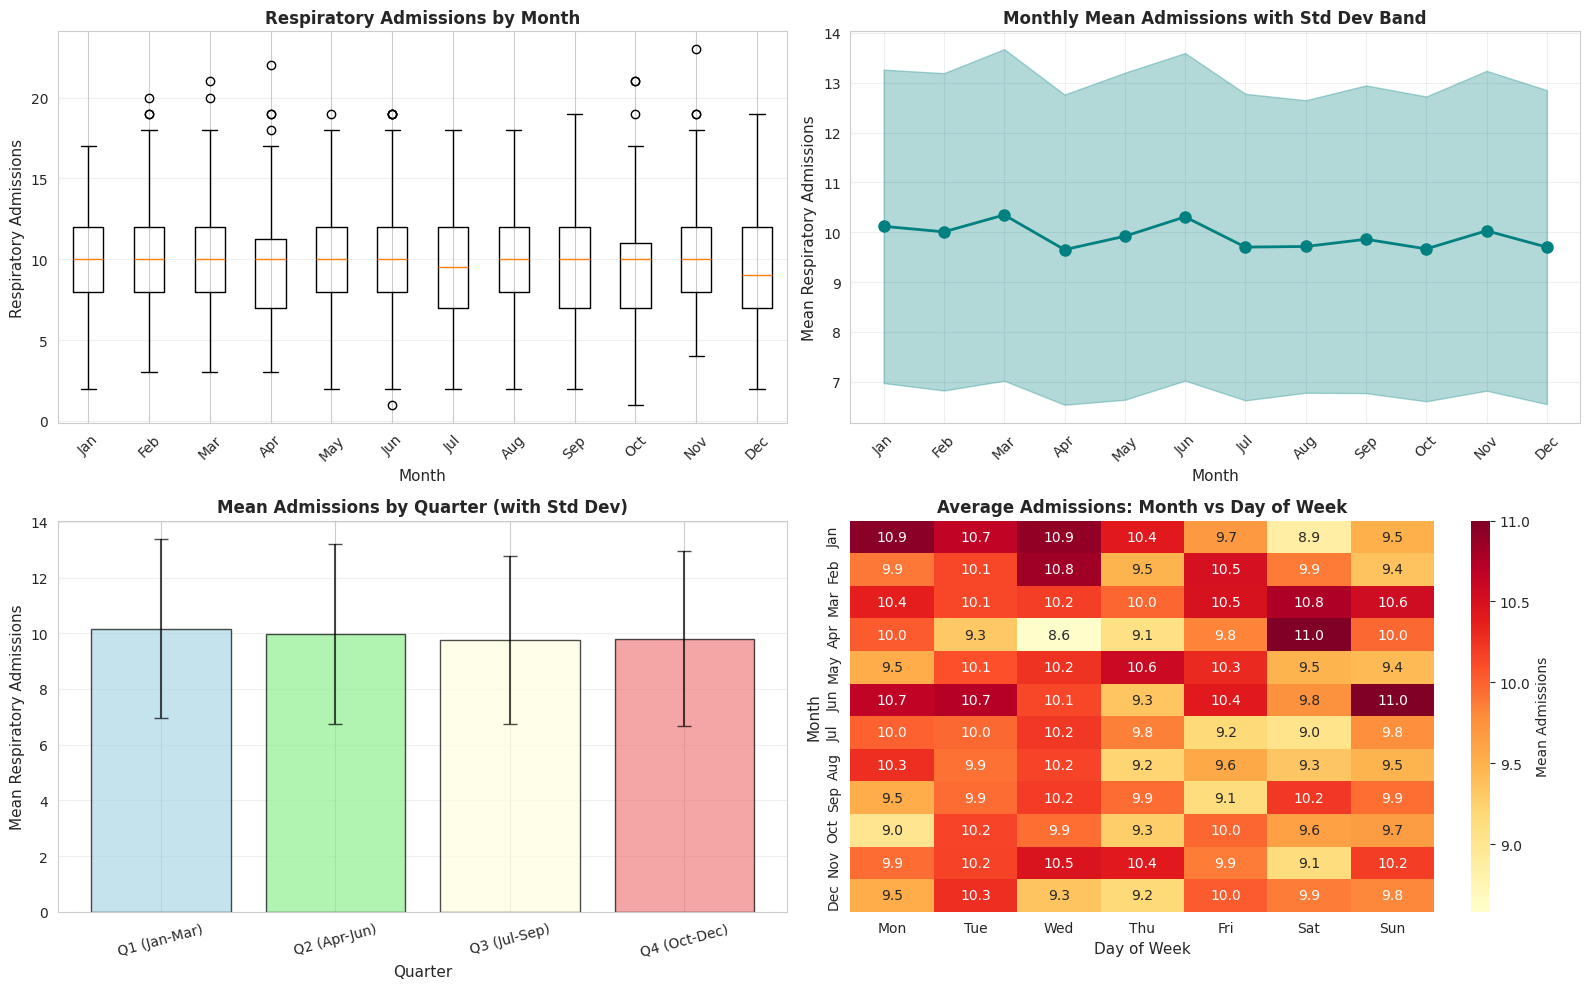


SUMMARY: TEMPORAL PATTERNS IN RESPIRATORY ADMISSIONS

1. DAY-TO-DAY VARIABILITY:
   ✓ HIGH variability (CV = 31.9%)

2. WEEKDAY/WEEKEND PATTERNS:
   ✓ No significant difference between weekdays and weekends

3. SEASONAL PATTERNS:
   ✓ Peak month: Mar (10.3 admissions)
   ✓ Lowest month: Apr (9.7 admissions)
   ✓ Seasonal variation: 7.0% range



In [37]:
# @title
# ============================================================================
# TEMPORAL ANALYSIS: Day-to-Day Variability and Patterns
# ============================================================================

print("=" * 80)
print("TEMPORAL ANALYSIS: RESPIRATORY ADMISSIONS PATTERNS")
print("=" * 80)

# Reload data with date column
df_temporal = pd.read_csv(url)

# Convert date to datetime
df_temporal['date'] = pd.to_datetime(df_temporal['date'], format='%Y-%m-%d')
df_temporal = df_temporal.sort_values('date')

# Extract temporal features
df_temporal['year'] = df_temporal['date'].dt.year
df_temporal['month'] = df_temporal['date'].dt.month
df_temporal['day_of_week'] = df_temporal['date'].dt.dayofweek  # 0=Monday, 6=Sunday
df_temporal['day_name'] = df_temporal['date'].dt.day_name()
df_temporal['is_weekend'] = df_temporal['day_of_week'].isin([5, 6]).astype(int)
df_temporal['quarter'] = df_temporal['date'].dt.quarter
df_temporal['week_of_year'] = df_temporal['date'].dt.isocalendar().week

print("\n" + "-" * 80)
print("1. DAY-TO-DAY VARIABILITY ANALYSIS")
print("-" * 80)

# Calculate day-to-day changes
df_temporal['daily_change'] = df_temporal['respiratory_admissions'].diff()
df_temporal['daily_pct_change'] = df_temporal['respiratory_admissions'].pct_change() * 100

print(f"\nDay-to-Day Variability Statistics:")
print(f"  Mean Daily Change: {df_temporal['daily_change'].mean():.2f} admissions")
print(f"  Std Dev of Daily Change: {df_temporal['daily_change'].std():.2f} admissions")
print(f"  Mean Absolute Daily Change: {df_temporal['daily_change'].abs().mean():.2f} admissions")
print(f"  Max Daily Increase: {df_temporal['daily_change'].max():.2f} admissions")
print(f"  Max Daily Decrease: {df_temporal['daily_change'].min():.2f} admissions")
print(f"\n  Mean % Change: {df_temporal['daily_pct_change'].mean():.2f}%")
print(f"  Std Dev of % Change: {df_temporal['daily_pct_change'].std():.2f}%")

# Coefficient of Variation
cv = (df_temporal['respiratory_admissions'].std() / df_temporal['respiratory_admissions'].mean()) * 100
print(f"\n  Coefficient of Variation: {cv:.2f}%")
print(f"  (Values > 30% indicate high variability)")

# Visualize day-to-day variability
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Time series plot
axes[0, 0].plot(df_temporal['date'], df_temporal['respiratory_admissions'],
                linewidth=0.8, color='steelblue', alpha=0.7)
axes[0, 0].set_xlabel('Date', fontsize=11)
axes[0, 0].set_ylabel('Respiratory Admissions', fontsize=11)
axes[0, 0].set_title('Time Series: Respiratory Admissions Over Time',
                      fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Daily changes
axes[0, 1].plot(df_temporal['date'], df_temporal['daily_change'],
                linewidth=0.8, color='coral', alpha=0.7)
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[0, 1].set_xlabel('Date', fontsize=11)
axes[0, 1].set_ylabel('Daily Change in Admissions', fontsize=11)
axes[0, 1].set_title('Day-to-Day Change in Respiratory Admissions',
                      fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Distribution of daily changes
axes[1, 0].hist(df_temporal['daily_change'].dropna(), bins=50,
                edgecolor='black', alpha=0.7, color='lightcoral')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Daily Change in Admissions', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Distribution of Day-to-Day Changes',
                      fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Autocorrelation (lag 1-30 days)
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_temporal['respiratory_admissions'], ax=axes[1, 1])
axes[1, 1].set_xlabel('Lag (days)', fontsize=11)
axes[1, 1].set_ylabel('Autocorrelation', fontsize=11)
axes[1, 1].set_title('Autocorrelation: Respiratory Admissions',
                      fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)
axes[1, 1].set_xlim(0, 90)

plt.tight_layout()
plt.show()

print("\n" + "-" * 80)
print("2. WEEKDAY vs WEEKEND PATTERN ANALYSIS")
print("-" * 80)

# Compare weekday vs weekend
weekday_weekend_stats = df_temporal.groupby('is_weekend')['respiratory_admissions'].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std Dev', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
])
weekday_weekend_stats.index = ['Weekday', 'Weekend']

print("\nWeekday vs Weekend Statistics:")
print(weekday_weekend_stats)

# Statistical test (t-test)
from scipy import stats
weekday_data = df_temporal[df_temporal['is_weekend'] == 0]['respiratory_admissions']
weekend_data = df_temporal[df_temporal['is_weekend'] == 1]['respiratory_admissions']
t_stat, p_value = stats.ttest_ind(weekday_data, weekend_data)

print(f"\nIndependent t-test:")
print(f"  t-statistic: {t_stat:.4f}")
print(f"  p-value: {p_value:.4f}")
if p_value < 0.05:
    print(f"  Result: Significant difference between weekday and weekend admissions (p < 0.05)")
else:
    print(f"  Result: No significant difference between weekday and weekend admissions (p ≥ 0.05)")

# Day of week analysis
day_stats = df_temporal.groupby('day_name')['respiratory_admissions'].agg([
    ('Mean', 'mean'),
    ('Std Dev', 'std'),
    ('Count', 'count')
]).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

print("\n" + "-" * 80)
print("Mean Respiratory Admissions by Day of Week:")
print("-" * 80)
print(day_stats)

# Visualize weekday patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Box plot by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_temporal['day_name'] = pd.Categorical(df_temporal['day_name'], categories=day_order, ordered=True)

axes[0, 0].boxplot([df_temporal[df_temporal['day_name'] == day]['respiratory_admissions'].values
                     for day in day_order],
                    labels=day_order)
axes[0, 0].set_xlabel('Day of Week', fontsize=11)
axes[0, 0].set_ylabel('Respiratory Admissions', fontsize=11)
axes[0, 0].set_title('Respiratory Admissions by Day of Week',
                      fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Bar chart of mean admissions by day
colors = ['lightblue'] * 5 + ['lightcoral'] * 2  # Weekdays blue, weekends red
axes[0, 1].bar(day_stats.index, day_stats['Mean'], color=colors,
               alpha=0.7, edgecolor='black')
axes[0, 1].errorbar(day_stats.index, day_stats['Mean'],
                    yerr=day_stats['Std Dev'], fmt='none',
                    color='black', capsize=5, alpha=0.7)
axes[0, 1].set_xlabel('Day of Week', fontsize=11)
axes[0, 1].set_ylabel('Mean Respiratory Admissions', fontsize=11)
axes[0, 1].set_title('Mean Admissions by Day of Week (with Std Dev)',
                      fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Weekday vs Weekend comparison
weekday_weekend_data = [weekday_data, weekend_data]
axes[1, 0].boxplot(weekday_weekend_data, labels=['Weekday', 'Weekend'])
axes[1, 0].set_ylabel('Respiratory Admissions', fontsize=11)
axes[1, 0].set_title('Weekday vs Weekend Admissions',
                      fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Violin plot
parts = axes[1, 1].violinplot(weekday_weekend_data, positions=[1, 2],
                               showmeans=True, showmedians=True)
axes[1, 1].set_xticks([1, 2])
axes[1, 1].set_xticklabels(['Weekday', 'Weekend'])
axes[1, 1].set_ylabel('Respiratory Admissions', fontsize=11)
axes[1, 1].set_title('Distribution: Weekday vs Weekend',
                      fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "-" * 80)
print("3. SEASONAL PATTERN ANALYSIS")
print("-" * 80)

# Monthly analysis
month_stats = df_temporal.groupby('month')['respiratory_admissions'].agg([
    ('Mean', 'mean'),
    ('Std Dev', 'std'),
    ('Count', 'count')
])
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_stats.index = [month_names[i-1] for i in month_stats.index]

print("\nMean Respiratory Admissions by Month:")
print(month_stats)

# Quarterly analysis
quarter_stats = df_temporal.groupby('quarter')['respiratory_admissions'].agg([
    ('Mean', 'mean'),
    ('Std Dev', 'std'),
    ('Count', 'count')
])
quarter_labels = ['Q1 (Jan-Mar)', 'Q2 (Apr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dec)']
quarter_stats.index = quarter_labels

print("\n" + "-" * 80)
print("Mean Respiratory Admissions by Quarter:")
print("-" * 80)
print(quarter_stats)

# Visualize seasonal patterns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Monthly box plot
month_data = [df_temporal[df_temporal['month'] == i]['respiratory_admissions'].values
              for i in range(1, 13)]
axes[0, 0].boxplot(month_data, labels=month_names)
axes[0, 0].set_xlabel('Month', fontsize=11)
axes[0, 0].set_ylabel('Respiratory Admissions', fontsize=11)
axes[0, 0].set_title('Respiratory Admissions by Month',
                      fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Monthly mean with trend line
axes[0, 1].plot(month_stats.index, month_stats['Mean'],
                marker='o', linewidth=2, markersize=8, color='teal')
axes[0, 1].fill_between(range(len(month_stats)),
                        month_stats['Mean'] - month_stats['Std Dev'],
                        month_stats['Mean'] + month_stats['Std Dev'],
                        alpha=0.3, color='teal')
axes[0, 1].set_xlabel('Month', fontsize=11)
axes[0, 1].set_ylabel('Mean Respiratory Admissions', fontsize=11)
axes[0, 1].set_title('Monthly Mean Admissions with Std Dev Band',
                      fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Quarterly comparison
axes[1, 0].bar(quarter_stats.index, quarter_stats['Mean'],
               color=['lightblue', 'lightgreen', 'lightyellow', 'lightcoral'],
               alpha=0.7, edgecolor='black')
axes[1, 0].errorbar(range(len(quarter_stats)), quarter_stats['Mean'],
                    yerr=quarter_stats['Std Dev'], fmt='none',
                    color='black', capsize=5, alpha=0.7)
axes[1, 0].set_xlabel('Quarter', fontsize=11)
axes[1, 0].set_ylabel('Mean Respiratory Admissions', fontsize=11)
axes[1, 0].set_title('Mean Admissions by Quarter (with Std Dev)',
                      fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=15)

# Heatmap: Day of Week vs Month
pivot_data = df_temporal.groupby(['month', 'day_of_week'])['respiratory_admissions'].mean().unstack()
pivot_data.index = month_names
pivot_data.columns = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='YlOrRd',
            ax=axes[1, 1], cbar_kws={'label': 'Mean Admissions'})
axes[1, 1].set_xlabel('Day of Week', fontsize=11)
axes[1, 1].set_ylabel('Month', fontsize=11)
axes[1, 1].set_title('Average Admissions: Month vs Day of Week',
                      fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("SUMMARY: TEMPORAL PATTERNS IN RESPIRATORY ADMISSIONS")
print("=" * 80)

print(f"\n1. DAY-TO-DAY VARIABILITY:")
if cv > 30:
    print(f"   ✓ HIGH variability (CV = {cv:.1f}%)")
else:
    print(f"   ✓ MODERATE variability (CV = {cv:.1f}%)")

print(f"\n2. WEEKDAY/WEEKEND PATTERNS:")
if p_value < 0.05:
    diff_pct = abs((weekday_data.mean() - weekend_data.mean()) / weekday_data.mean() * 100)
    if weekday_data.mean() > weekend_data.mean():
        print(f"   ✓ Weekdays have HIGHER admissions than weekends")
    else:
        print(f"   ✓ Weekends have HIGHER admissions than weekdays")
    print(f"   ✓ Difference is statistically significant ({diff_pct:.1f}% difference)")
else:
    print(f"   ✓ No significant difference between weekdays and weekends")

print(f"\n3. SEASONAL PATTERNS:")
max_month = month_stats['Mean'].idxmax()
min_month = month_stats['Mean'].idxmin()
seasonal_range = ((month_stats['Mean'].max() - month_stats['Mean'].min()) /
                  month_stats['Mean'].mean() * 100)
print(f"   ✓ Peak month: {max_month} ({month_stats.loc[max_month, 'Mean']:.1f} admissions)")
print(f"   ✓ Lowest month: {min_month} ({month_stats.loc[min_month, 'Mean']:.1f} admissions)")
print(f"   ✓ Seasonal variation: {seasonal_range:.1f}% range")

print("\n" + "=" * 80)